In [ ]:
import pandas as pd

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/NLP/Project/Tweets.csv')

In [ ]:
df["text"] = df["text"].astype(str)

In [ ]:
df.dropna()
def preprocess(text, urban_dictionary=True, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_noneEnglish=False, rm_punctuations=False):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    #text = re.sub(r'\d+', '', text) #Remove digits

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  text = text.lower()

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass

  if rm_stopwords:
    #stopNLTK = stopwords.words('english')
    stopSP = sp.Defaults.stop_words | {'im', 's', 'ive'} #spaCy defaults stopwrods | custom words
    text = word_tokenize(text)
    #text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = [word for word in text if not word.lower() in set(stopSP)]
    text = ' '.join(text)

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])
    #text = " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)])

  if rm_noneEnglish:
    text = text.split(' ')
    text = [word for word in text if word in ENGLISH_WORDS]
    text = ' '.join(text)

  if rm_punctuations:
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

  return text

df['text P'] = df['text'].apply(preprocess)

df.head(5000)


textID                                               text  \
0     cb774db0d1                I`d have responded, if I were going   
1     549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2     088c60f138                          my boss is bullying me...   
3     9642c003ef                     what interview! leave me alone   
4     358bd9e861   Sons of ****, why couldn`t they put them on t...   
...          ...                                                ...   
4995  7dfa892961   look like i can only quick post from the dash...   
4996  b60b7e3175   Thanks Elaine. I`m clipping reviews for her s...   
4997  efb00d5c4d  K now that, that fiasco is all wrapped and goo...   
4998  65473dec6e                  No. I won`t be back until the 7th   
4999  375b64de34  Sooo tired and have a headache-all self inflic...   

                                          selected_text sentiment  \
0                   I`d have responded, if I were going   neutral   
1                                              Sooo SAD  negative   
2                                           bullying me  negative   
3                                        leave me alone  negative   
4                                         Sons of ****,  negative   
...                                                 ...       ...   
4995  look like i can only quick post from the dashb...   neutral   
4996                                             Thanks  positive   
4997  K now that, that fiasco is all wrapped and goo...  positive   
4998                  No. I won`t be back until the 7th   neutral   
4999  Sooo tired and have a headache-all self inflic...   neutral   

                                                 text P  
0                                     responded , going  
1                         sooo sad miss san diego ! ! !  
2                                      bos bullying ...  
3                                     interview ! leave  
4                          son * * * * , release bought  
...                                                 ...  
4995                     look like quick post dashboard  
4996        thanks elaine . clipping review scrapbook .  
4997       k , fiasco wrapped good studying midterm = (  
4998                                           . wo 7th  
4999  sooo tired headache-all self inflicted course ...  

[5000 rows x 5 columns]

In [ ]:
df.dropna()
def preprocess(text, urban_dictionary=True, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_noneEnglish=False, rm_punctuations=True):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    #text = re.sub(r'\d+', '', text) #Remove digits

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  text = text.lower()

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass

  if rm_stopwords:
    #stopNLTK = stopwords.words('english')
    stopSP = sp.Defaults.stop_words | {'im', 's', 'ive'} #spaCy defaults stopwrods | custom words
    text = word_tokenize(text)
    #text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = [word for word in text if not word.lower() in set(stopSP)]
    text = ' '.join(text)

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])
    #text = " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)])

  if rm_noneEnglish:
    text = text.split(' ')
    text = [word for word in text if word in ENGLISH_WORDS]
    text = ' '.join(text)

  if rm_punctuations:
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

  return text

df['text P2'] = df['text'].apply(preprocess)

df.head(5000)


textID                                               text  \
0     cb774db0d1                I`d have responded, if I were going   
1     549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2     088c60f138                          my boss is bullying me...   
3     9642c003ef                     what interview! leave me alone   
4     358bd9e861   Sons of ****, why couldn`t they put them on t...   
...          ...                                                ...   
4995  7dfa892961   look like i can only quick post from the dash...   
4996  b60b7e3175   Thanks Elaine. I`m clipping reviews for her s...   
4997  efb00d5c4d  K now that, that fiasco is all wrapped and goo...   
4998  65473dec6e                  No. I won`t be back until the 7th   
4999  375b64de34  Sooo tired and have a headache-all self inflic...   

                                          selected_text sentiment  \
0                   I`d have responded, if I were going   neutral   
1                                              Sooo SAD  negative   
2                                           bullying me  negative   
3                                        leave me alone  negative   
4                                         Sons of ****,  negative   
...                                                 ...       ...   
4995  look like i can only quick post from the dashb...   neutral   
4996                                             Thanks  positive   
4997  K now that, that fiasco is all wrapped and goo...  positive   
4998                  No. I won`t be back until the 7th   neutral   
4999  Sooo tired and have a headache-all self inflic...   neutral   

                                                 text P  \
0                                     responded , going   
1                         sooo sad miss san diego ! ! !   
2                                      bos bullying ...   
3                                     interview ! leave   
4                          son * * * * , release bought   
...                                                 ...   
4995                     look like quick post dashboard   
4996        thanks elaine . clipping review scrapbook .   
4997       k , fiasco wrapped good studying midterm = (   
4998                                           . wo 7th   
4999  sooo tired headache-all self inflicted course ...   

                                                text P2  
0                                      responded  going  
1                            sooo sad miss san diego     
2                                         bos bullying   
3                                      interview  leave  
4                               son      release bought  
...                                                 ...  
4995                     look like quick post dashboard  
4996          thanks elaine  clipping review scrapbook   
4997          k  fiasco wrapped good studying midterm    
4998                                             wo 7th  
4999  sooo tired headacheall self inflicted course  ...  

[5000 rows x 6 columns]

In [ ]:
# Dropping unrequired columns
df.drop(columns=['textID', 'selected_text', 'text'], inplace=True)

In [ ]:
df.head(1000)

NameError: ignored

In [ ]:
# Drop neutral comments because it's they are not covered in our scope
df.drop(df[df['sentiment'] == 'neutral'].index, inplace=True)

In [ ]:
# Label the sentiment in preperation for Data Modelling
df['sentiment'] = df['sentiment'].map( {'negative': 0, 'positive': 1} )

In [ ]:
data_negative = df[df['sentiment'] == 0].copy()
data_positive = df[df['sentiment'] == 1].copy()

# Import the dependencies
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot for each category
def show_wordcloud(df, title, color = 'ocean_r', bg_color='lightgrey'):
    text = ' '.join(df['text P'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color=bg_color,
                    colormap=color, width=800, height=600).generate(text)

    plt.figure(figsize=(10,10), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

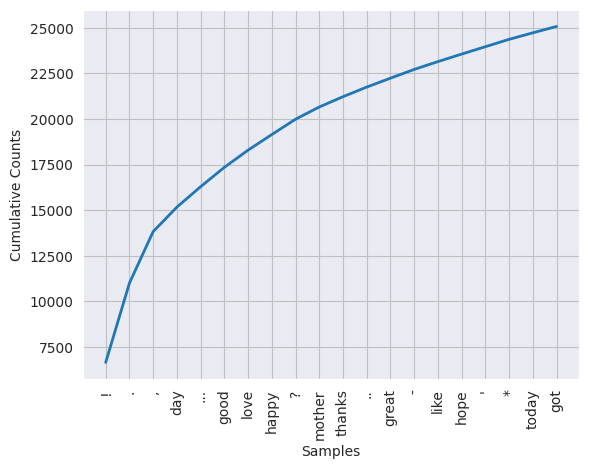

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist

# Plot for positive sentiments
text_data = data_positive['text P'].str.cat(sep=' ')
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)
plt.show()

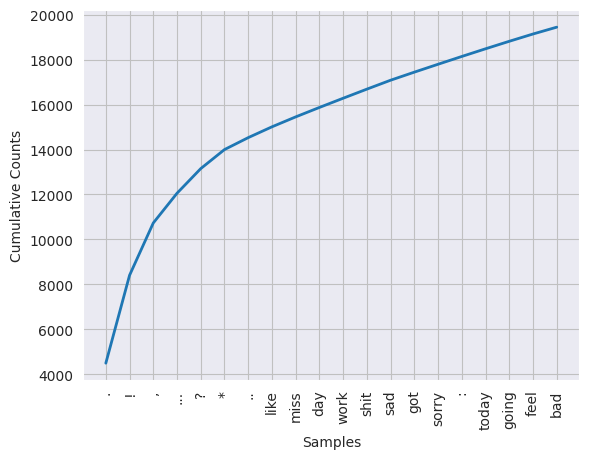

In [ ]:
# Plot for negative sentiments
text_data = data_negative['text P'].str.cat(sep=' ')
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)
plt.show()

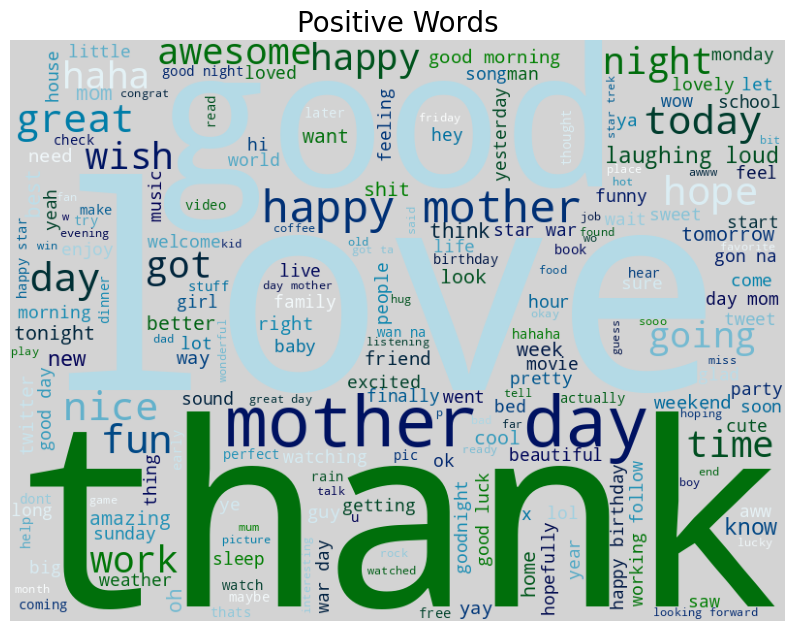

In [ ]:
show_wordcloud(data_positive, 'Positive Words', 'ocean_r', 'lightgrey')

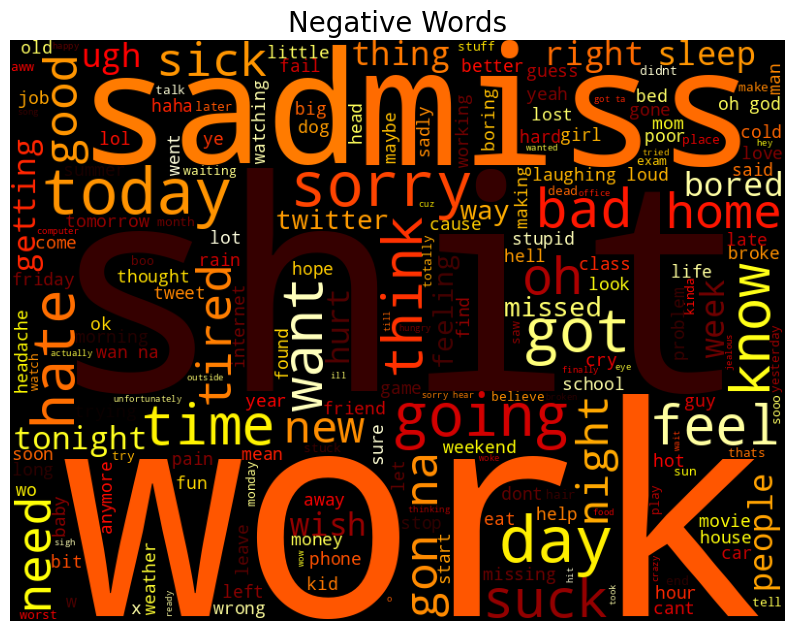

In [ ]:
show_wordcloud(data_negative, 'Negative Words', 'hot', 'black')

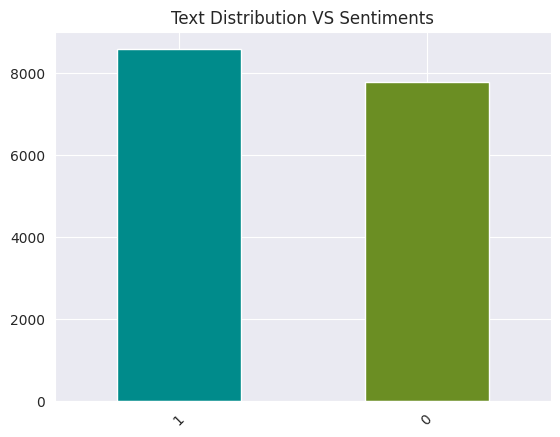

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_Class= pd.value_counts(df["sentiment"], sort= True)
sns.set_style("darkgrid")
count_Class.plot(kind = 'bar', color = ["darkcyan", "olivedrab"])
plt.title('Text Distribution VS Sentiments')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np
from sklearn.model_selection import train_test_split

X = df['text P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")

X_train shape: (13090,), Y_train shape: (13090,)


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
#vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
#vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print(vectorizer.vocabulary_)

{'totally': 65366, 'bereft': 6318, 'fault': 20159, 'way': 69749, 'totally bereft': 65372, 'bereft fault': 6319, 'fault way': 20169, '_kate': 983, 'know': 34284, 'heap': 28585, 'awesome': 4483, 'working': 72274, 'weekend': 70279, '_kate know': 984, 'know heap': 34381, 'heap awesome': 28586, 'awesome working': 4627, 'working weekend': 72357, 'wish': 71201, 'going': 24630, 'internet': 32216, 'week': 70137, 'wish going': 71277, 'going internet': 24749, 'internet week': 32251, 'stayin': 59233, 'dustins': 17488, 'tonight': 65049, 'car': 9803, 'hate': 27980, 'stayin dustins': 59234, 'dustins tonight': 17489, 'tonight car': 65067, 'car hate': 9832, 'sound': 58301, 'preachery': 49853, 'iphone': 32371, 'amazing': 2926, 'issue': 32525, 'firmware': 21257, 'wink': 71135, 'sound preachery': 58337, 'preachery iphone': 49854, 'iphone amazing': 32372, 'amazing issue': 2961, 'issue firmware': 32531, 'firmware wink': 21258, 'wink wink': 71137, 'love': 38105, 'hat': 27967, 'cool': 12890, 'look': 37467, 'l

In [ ]:
for term, index in vectorizer.vocabulary_.items():
    print(f'{term}: {index}')

In [ ]:
X_test_vectorized = vectorizer.transform(X_test)

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1567
           1       0.88      0.85      0.86      1706

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



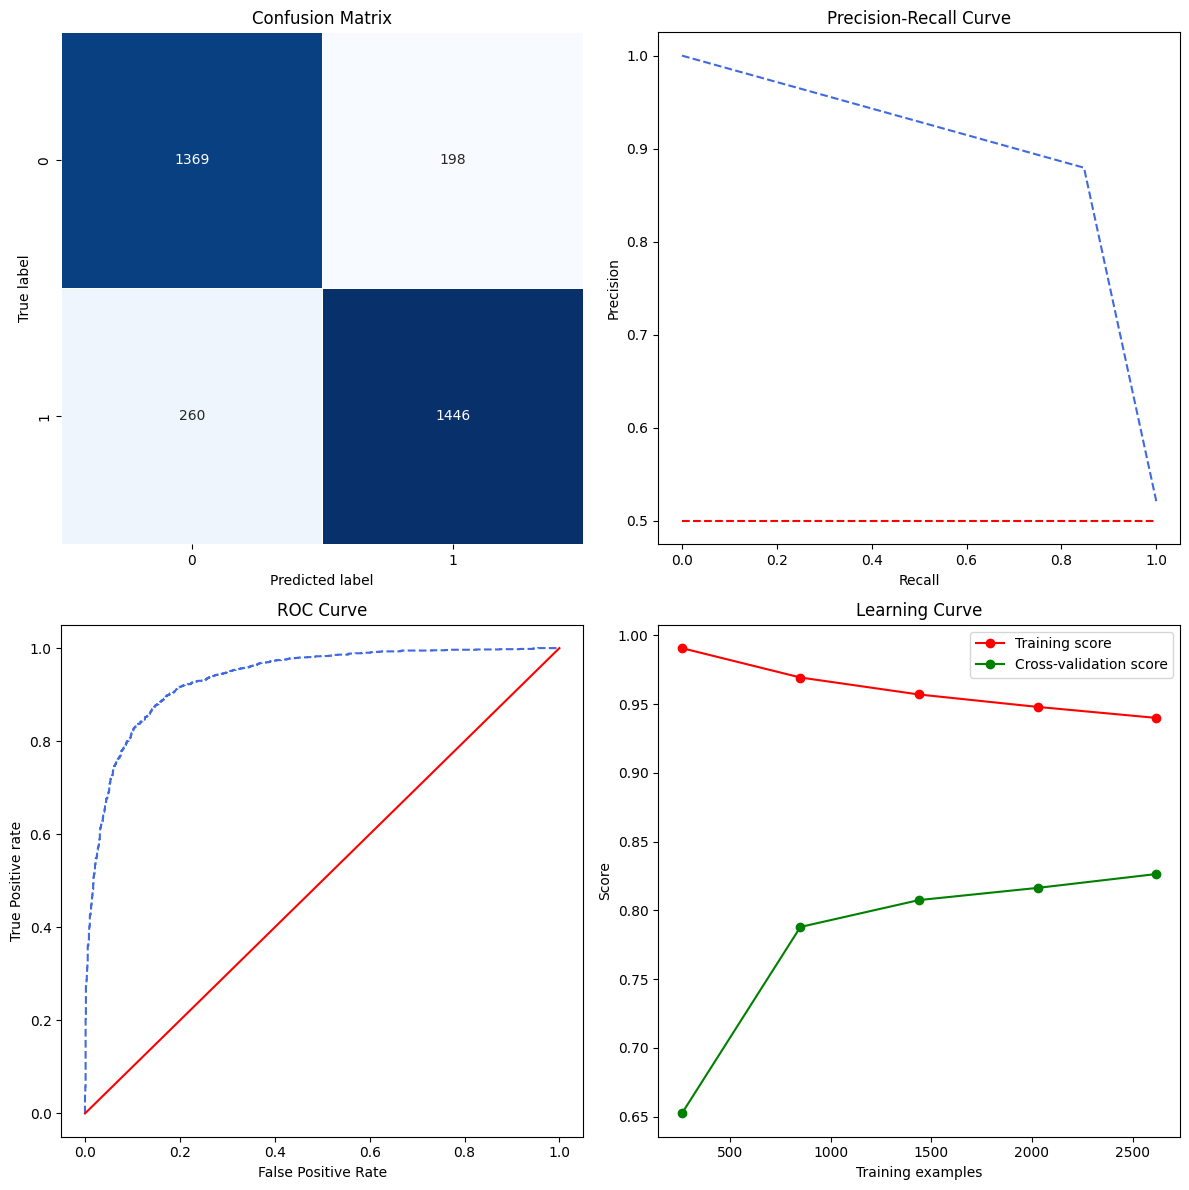

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1567
           1       0.84      0.88      0.86      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



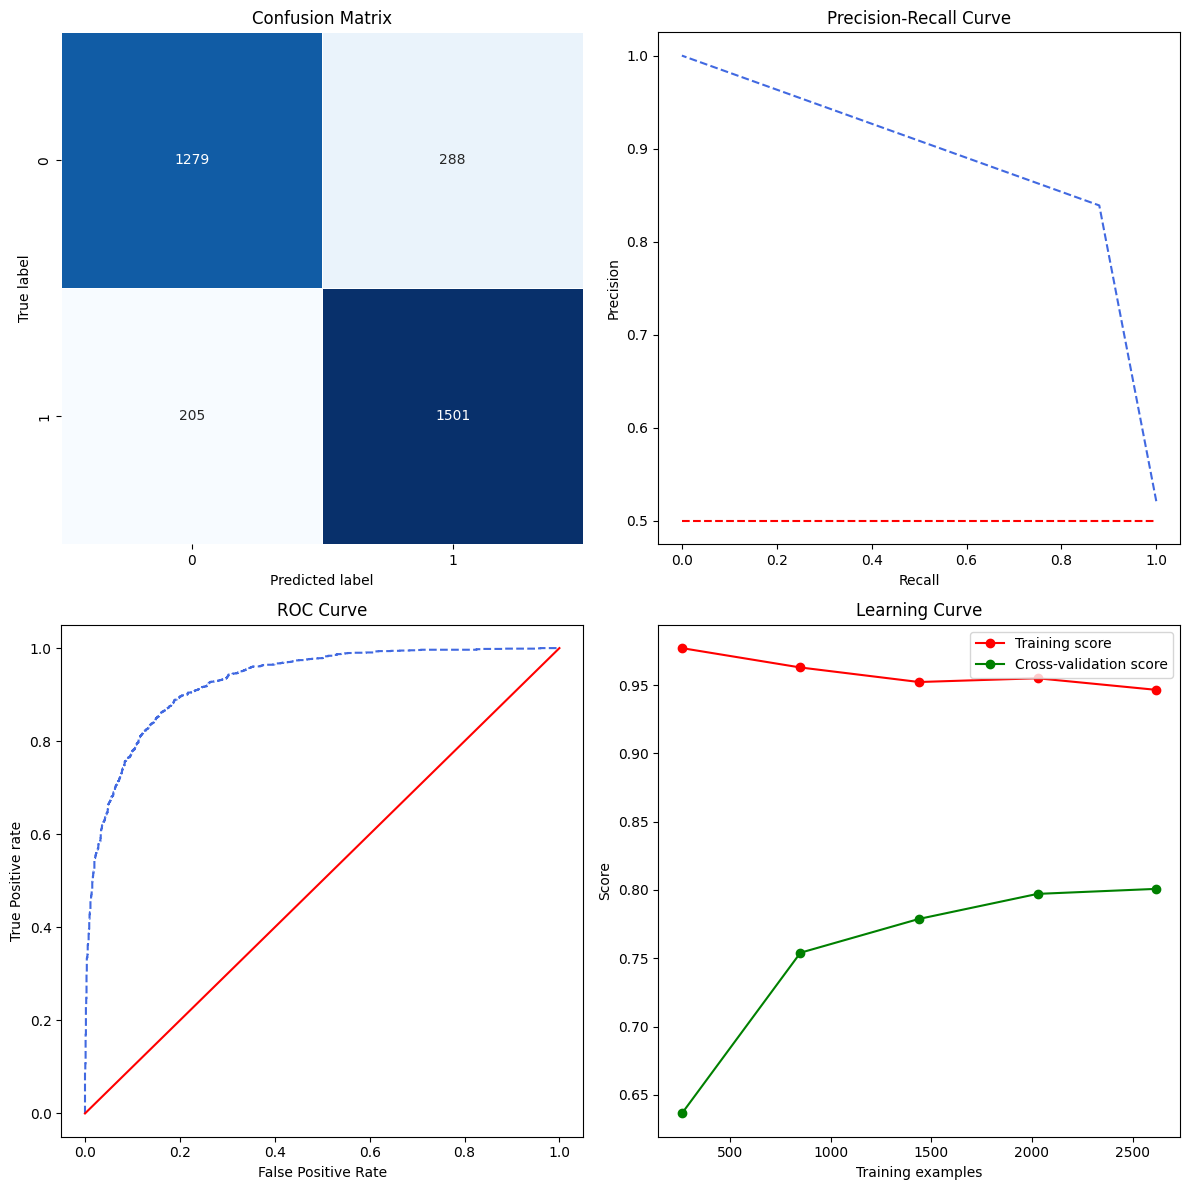

[Gaussian Naive Bayes]
              precision    recall  f1-score   support

           0       0.55      0.81      0.66      1567
           1       0.70      0.40      0.51      1706

    accuracy                           0.60      3273
   macro avg       0.63      0.61      0.58      3273
weighted avg       0.63      0.60      0.58      3273



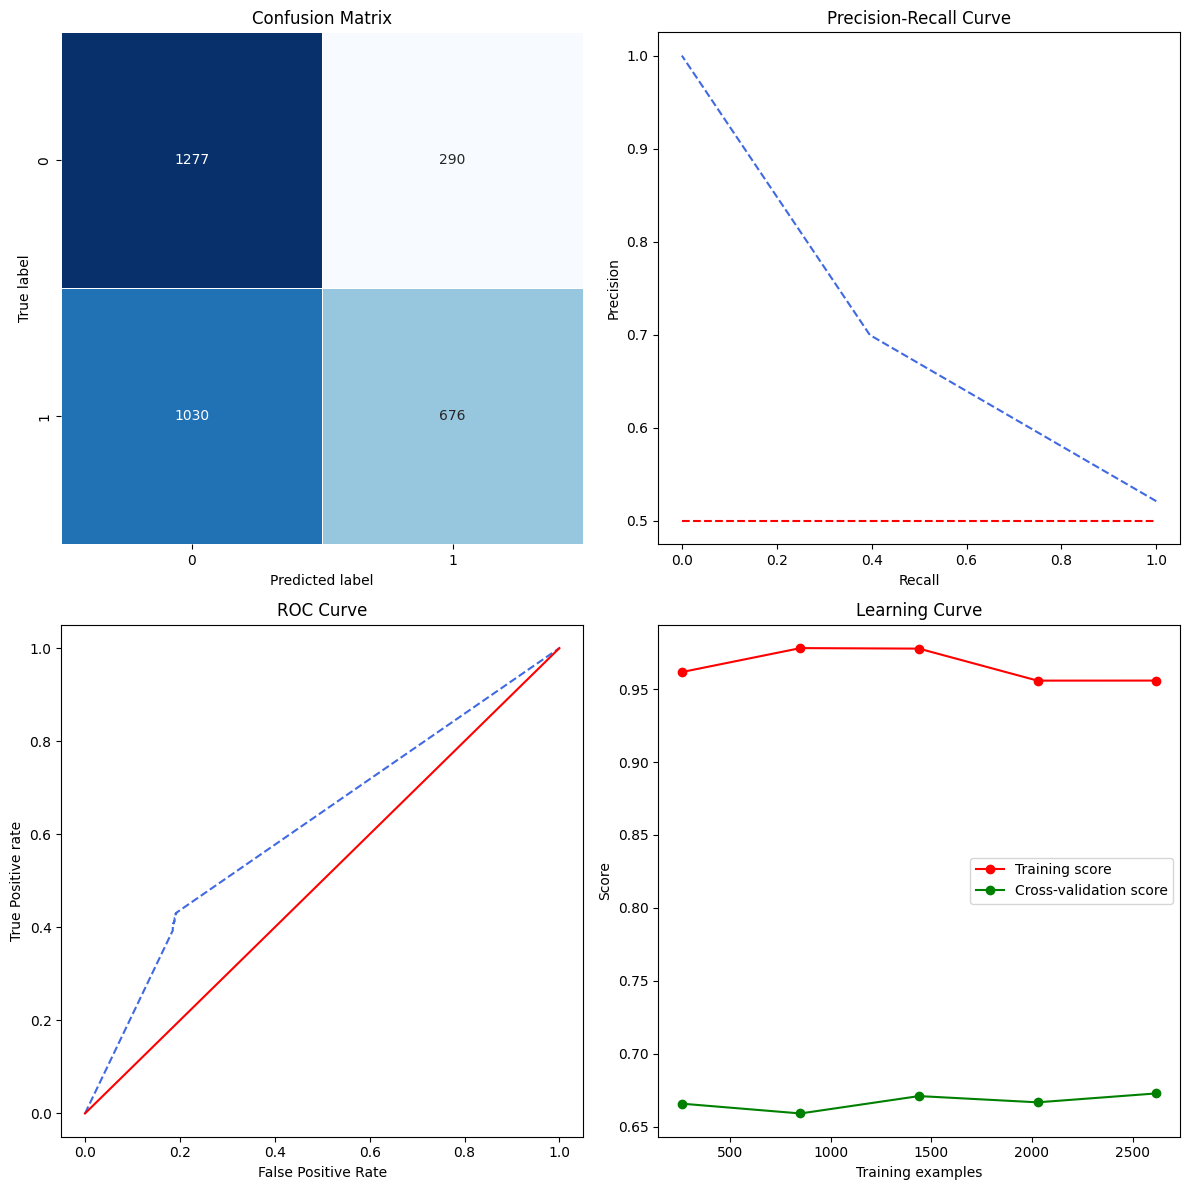

[SVC]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1567
           1       0.87      0.86      0.87      1706

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



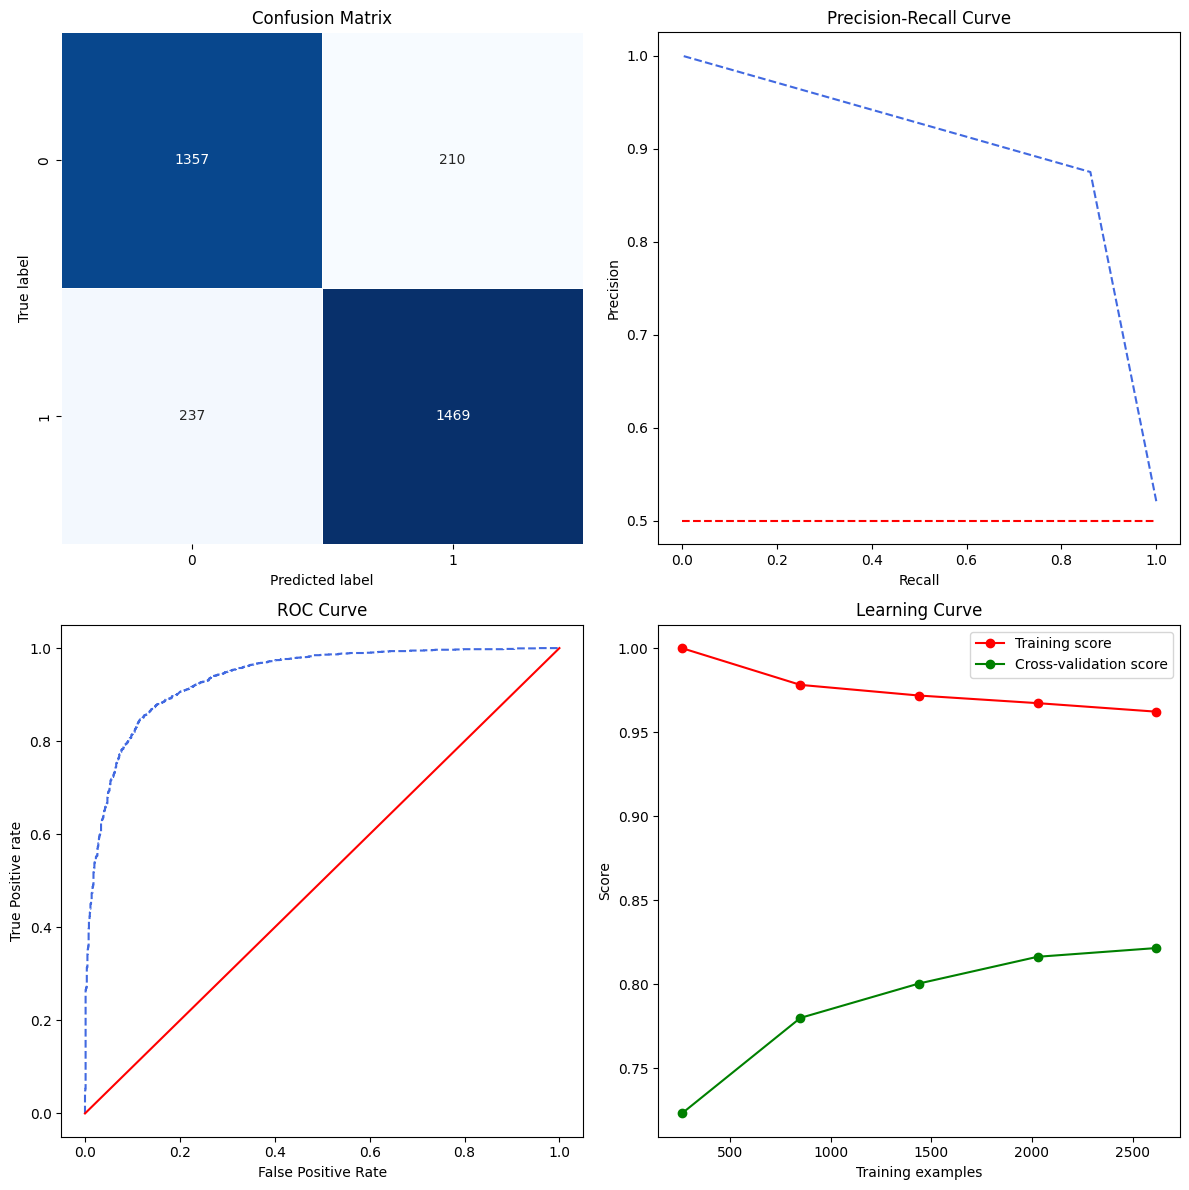

[LightGBM]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1567
           1       0.89      0.82      0.85      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



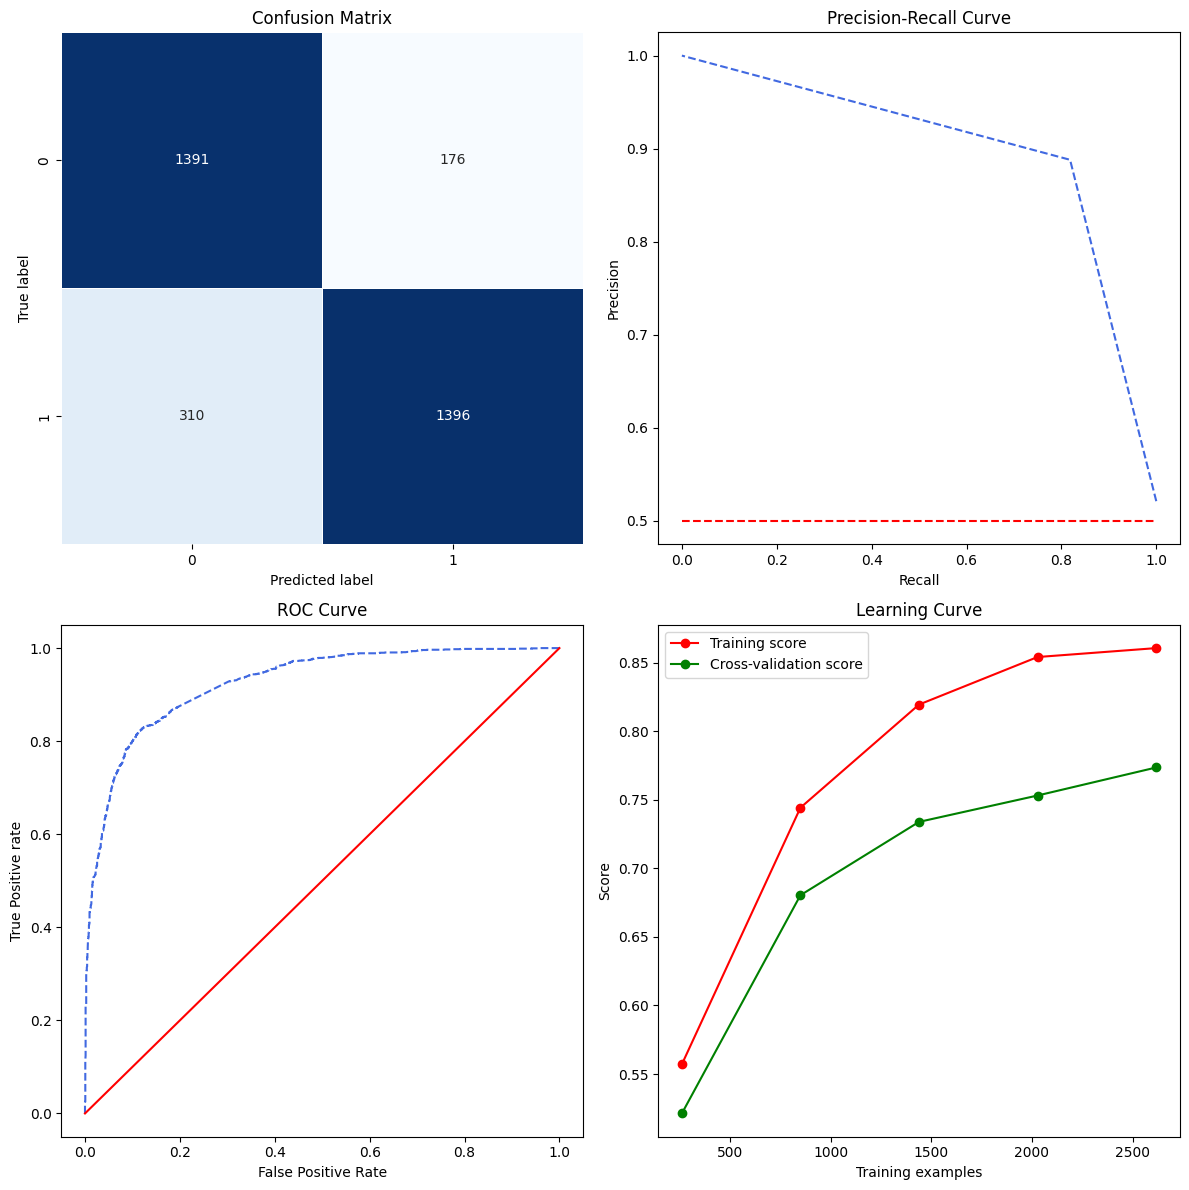

[SimpleRNN]
Epoch 1/50
410/410 [==============================] - 7s 13ms/step - loss: 0.4385 - accuracy: 0.7915 - val_loss: 0.3569 - val_accuracy: 0.8488
Epoch 2/50
410/410 [==============================] - 7s 17ms/step - loss: 0.2080 - accuracy: 0.9251 - val_loss: 0.3758 - val_accuracy: 0.8451
Epoch 3/50
410/410 [==============================] - 5s 12ms/step - loss: 0.1193 - accuracy: 0.9610 - val_loss: 0.4031 - val_accuracy: 0.8365
Epoch 4/50
410/410 [==============================] - 5s 12ms/step - loss: 0.0743 - accuracy: 0.9785 - val_loss: 0.5419 - val_accuracy: 0.8320
Epoch 5/50
410/410 [==============================] - 6s 15ms/step - loss: 0.0501 - accuracy: 0.9852 - val_loss: 0.5537 - val_accuracy: 0.8249
Epoch 6/50
410/410 [==============================] - 6s 14ms/step - loss: 0.0389 - accuracy: 0.9888 - val_loss: 0.5792 - val_accuracy: 0.8124
Epoch 7/50
410/410 [==============================] - 5s 11ms/step - loss: 0.0302 - accuracy: 0.9912 - val_loss: 0.6805 - val_accu

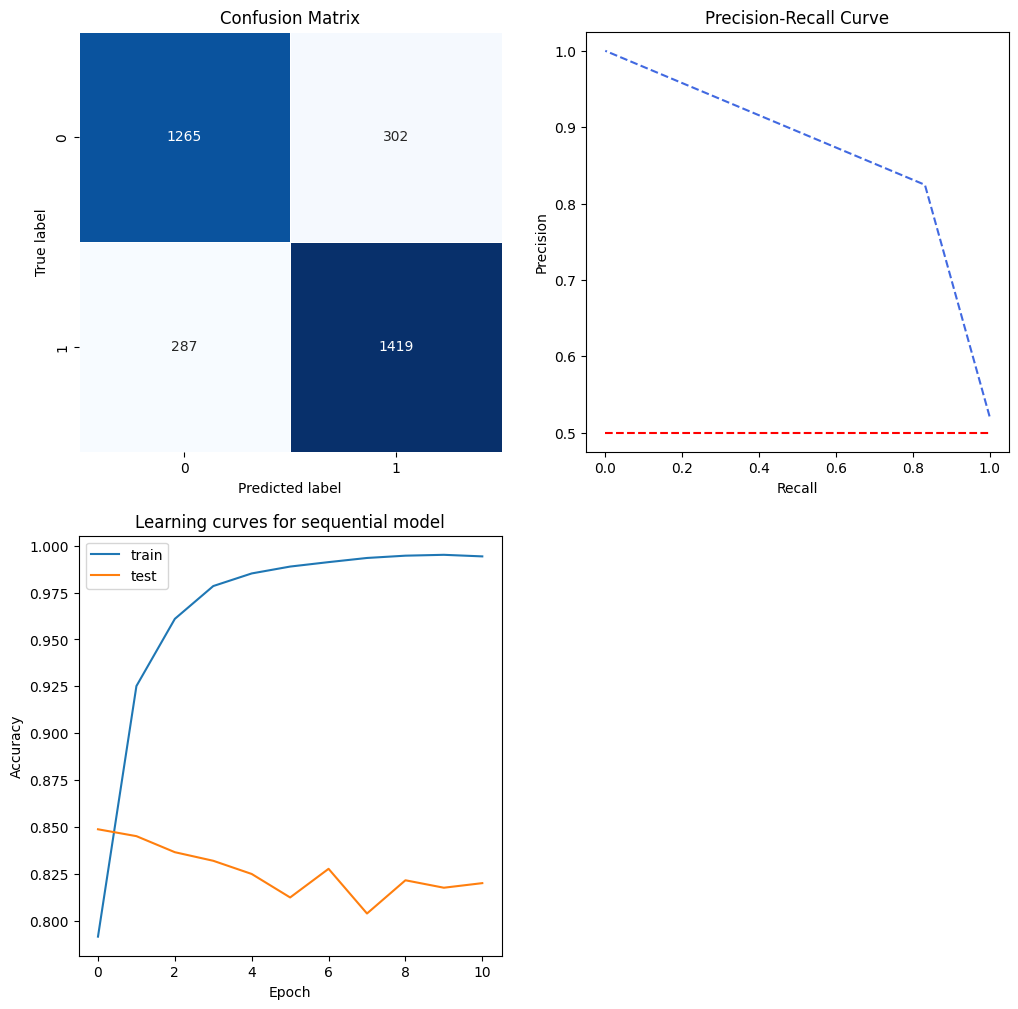

[LSTM]
Epoch 1/50
410/410 [==============================] - 12s 19ms/step - loss: 0.4240 - accuracy: 0.7862 - val_loss: 0.3382 - val_accuracy: 0.8530
Epoch 2/50
410/410 [==============================] - 10s 25ms/step - loss: 0.2109 - accuracy: 0.9210 - val_loss: 0.3935 - val_accuracy: 0.8454
Epoch 3/50
410/410 [==============================] - 8s 19ms/step - loss: 0.1365 - accuracy: 0.9561 - val_loss: 0.4185 - val_accuracy: 0.8356
Epoch 4/50
410/410 [==============================] - 9s 21ms/step - loss: 0.1048 - accuracy: 0.9672 - val_loss: 0.6084 - val_accuracy: 0.8271
Epoch 5/50
410/410 [==============================] - 8s 20ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.5670 - val_accuracy: 0.8231
Epoch 6/50
410/410 [==============================] - 8s 18ms/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.6074 - val_accuracy: 0.8240
Epoch 7/50
410/410 [==============================] - 9s 23ms/step - loss: 0.0577 - accuracy: 0.9834 - val_loss: 0.6565 - val_accurac

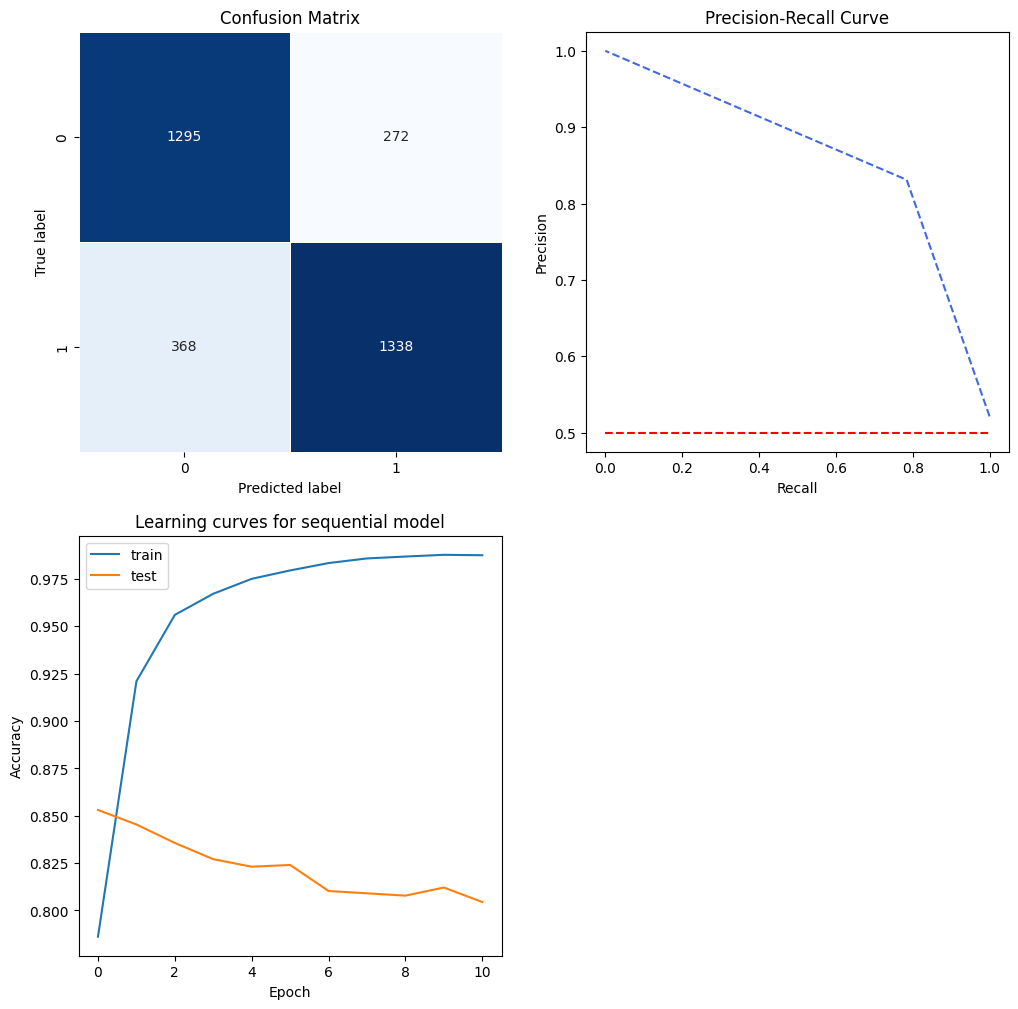

[BI-LSTM]
Epoch 1/50
410/410 [==============================] - 29s 59ms/step - loss: 0.4016 - accuracy: 0.8104 - val_loss: 0.3324 - val_accuracy: 0.8552
Epoch 2/50
410/410 [==============================] - 22s 55ms/step - loss: 0.1926 - accuracy: 0.9290 - val_loss: 0.3935 - val_accuracy: 0.8466
Epoch 3/50
410/410 [==============================] - 22s 53ms/step - loss: 0.1170 - accuracy: 0.9615 - val_loss: 0.4877 - val_accuracy: 0.8405
Epoch 4/50
410/410 [==============================] - 22s 53ms/step - loss: 0.0794 - accuracy: 0.9760 - val_loss: 0.5317 - val_accuracy: 0.8255
Epoch 5/50
410/410 [==============================] - 22s 53ms/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.5950 - val_accuracy: 0.8274
Epoch 6/50
410/410 [==============================] - 22s 53ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.6755 - val_accuracy: 0.8240
Epoch 7/50
410/410 [==============================] - 22s 54ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.8143 - val

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
import numpy as np

def plot_results(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(222)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(223)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

      #  Learning curve
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(224)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()
    else:
      plt.subplot(223)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['text P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
#vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 12
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
#    'KNN': KNeighborsClassifier(),
#'Linear SVC': LinearSVC(class_weight='balanced'),
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVC': SVC(kernel='linear', probability=True),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=50,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results(name, model, padded_test, Y_test, predictions, history)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1567
           1       0.87      0.87      0.87      1706

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



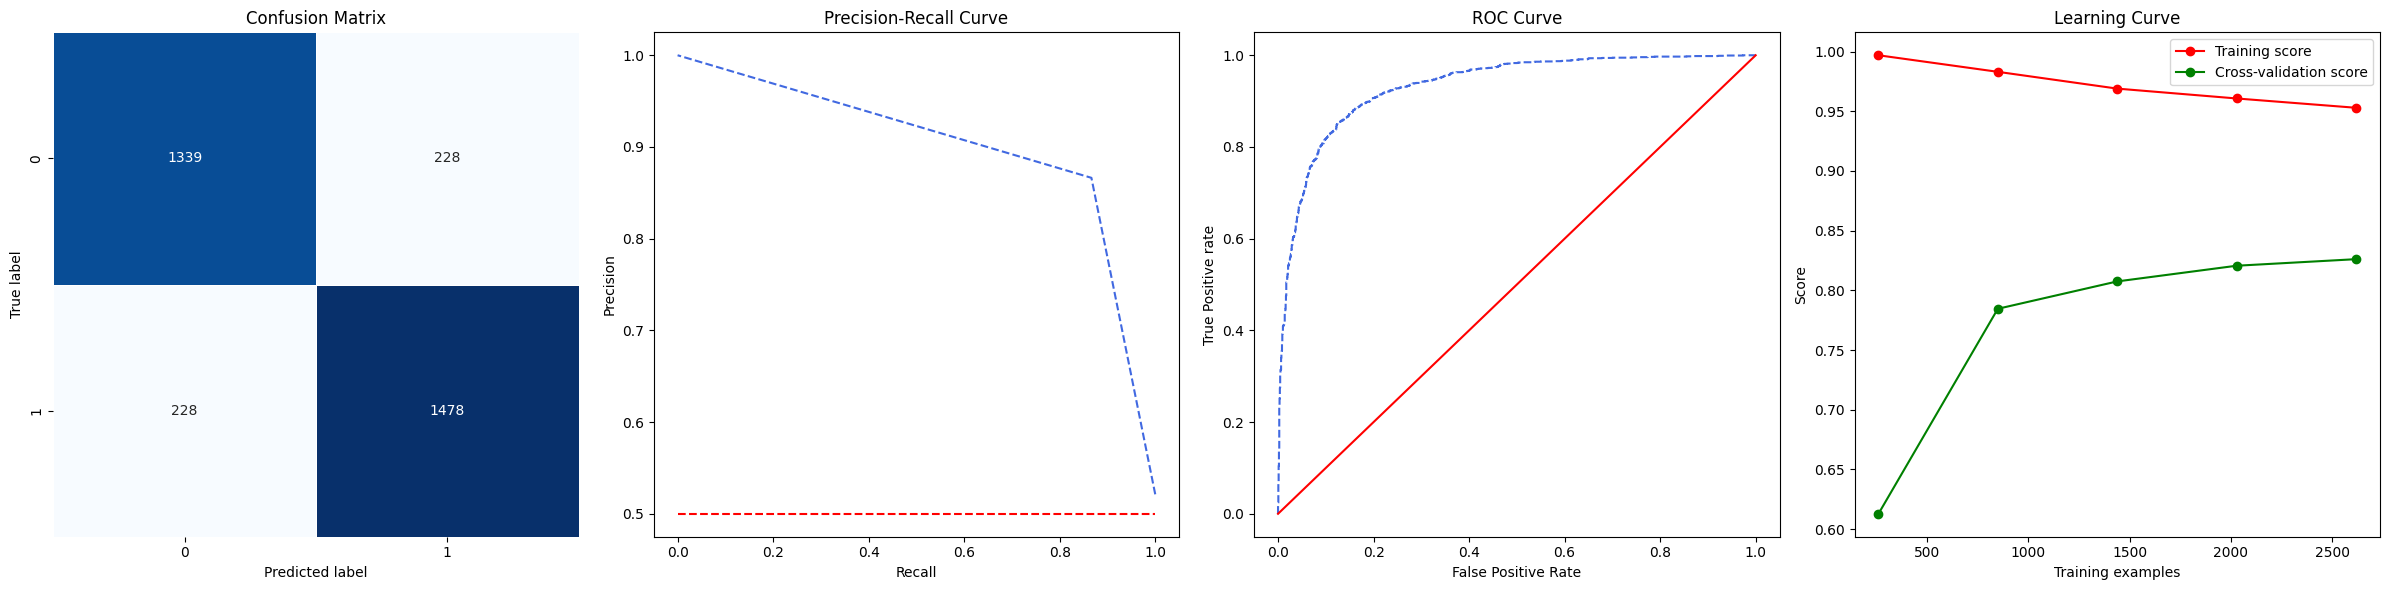

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1567
           1       0.83      0.90      0.86      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



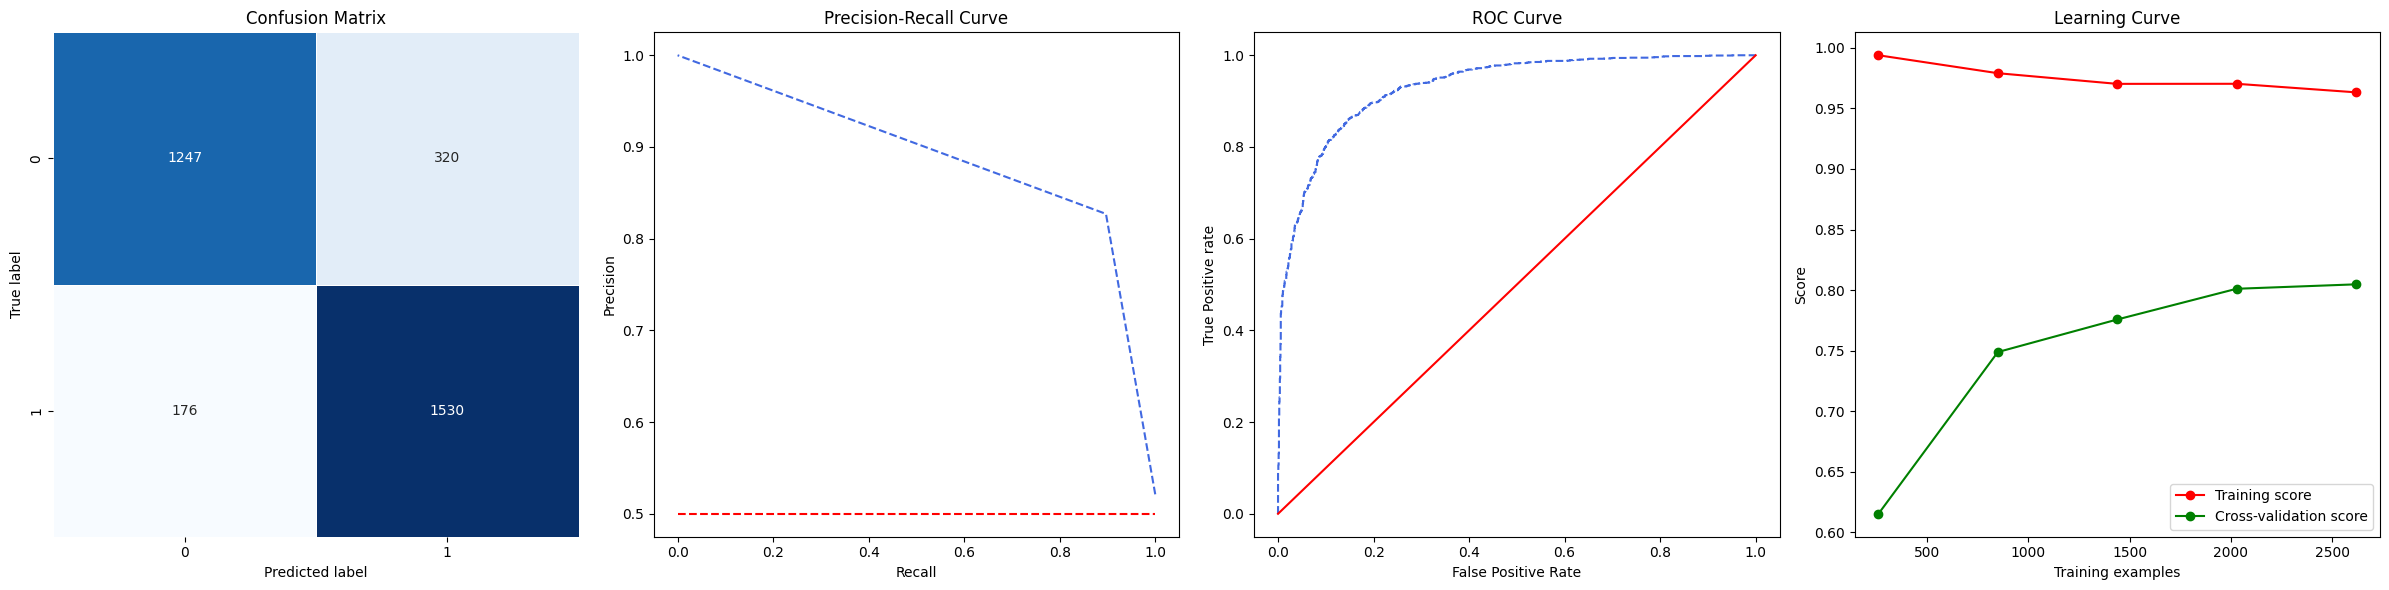

[Gaussian Naive Bayes]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1567
           1       0.75      0.56      0.64      1706

    accuracy                           0.67      3273
   macro avg       0.69      0.68      0.67      3273
weighted avg       0.69      0.67      0.67      3273



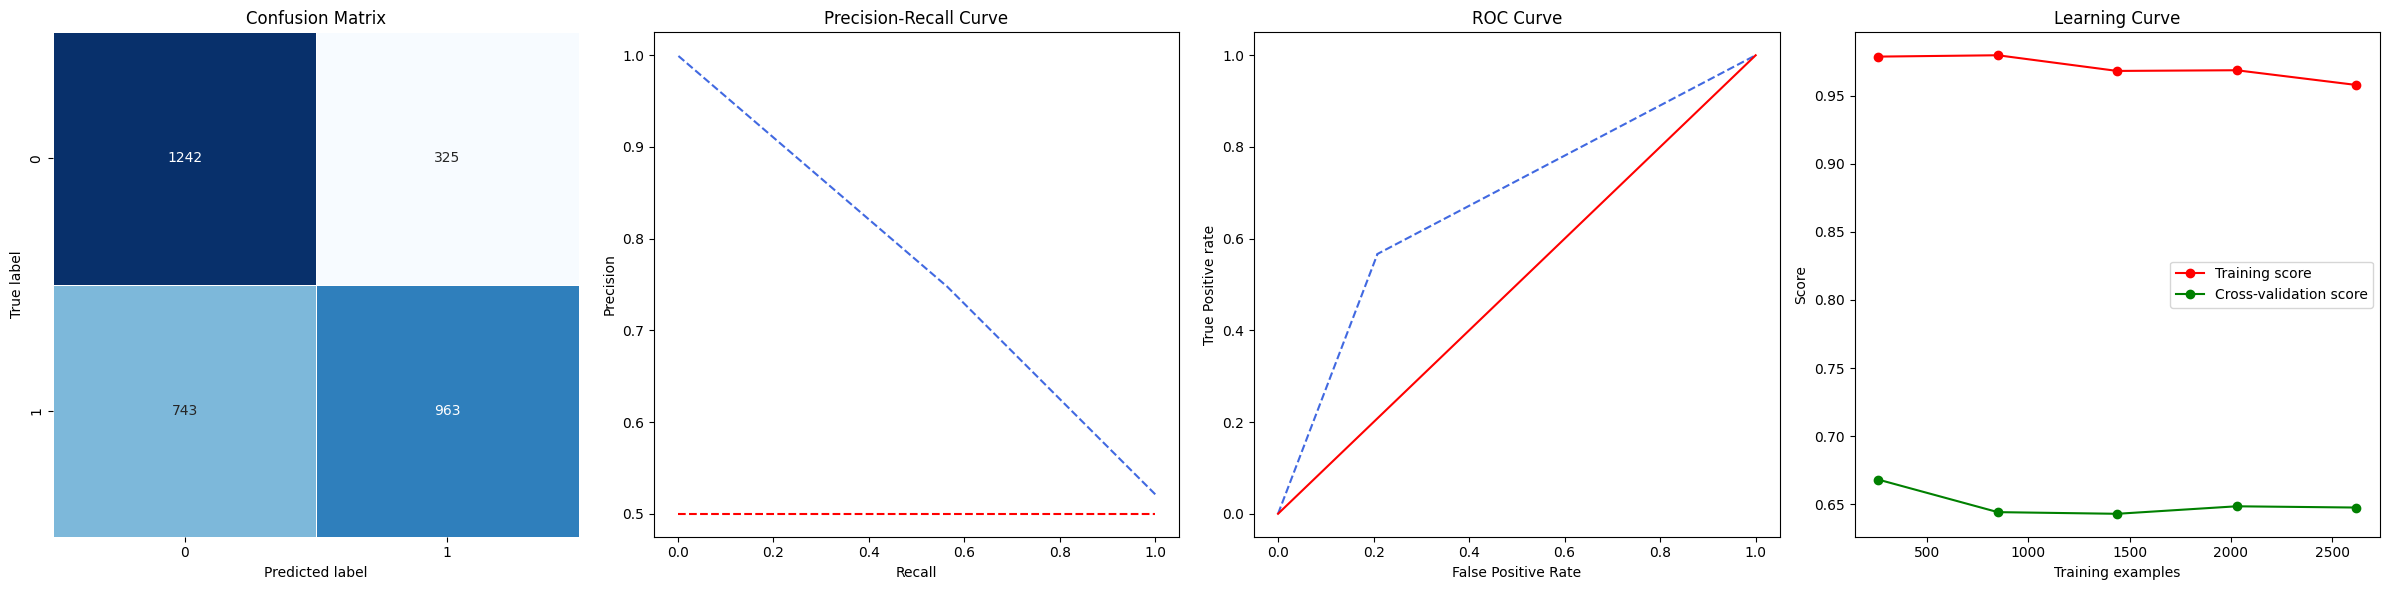

[SVC]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1567
           1       0.87      0.88      0.87      1706

    accuracy                           0.87      3273
   macro avg       0.87      0.87      0.87      3273
weighted avg       0.87      0.87      0.87      3273



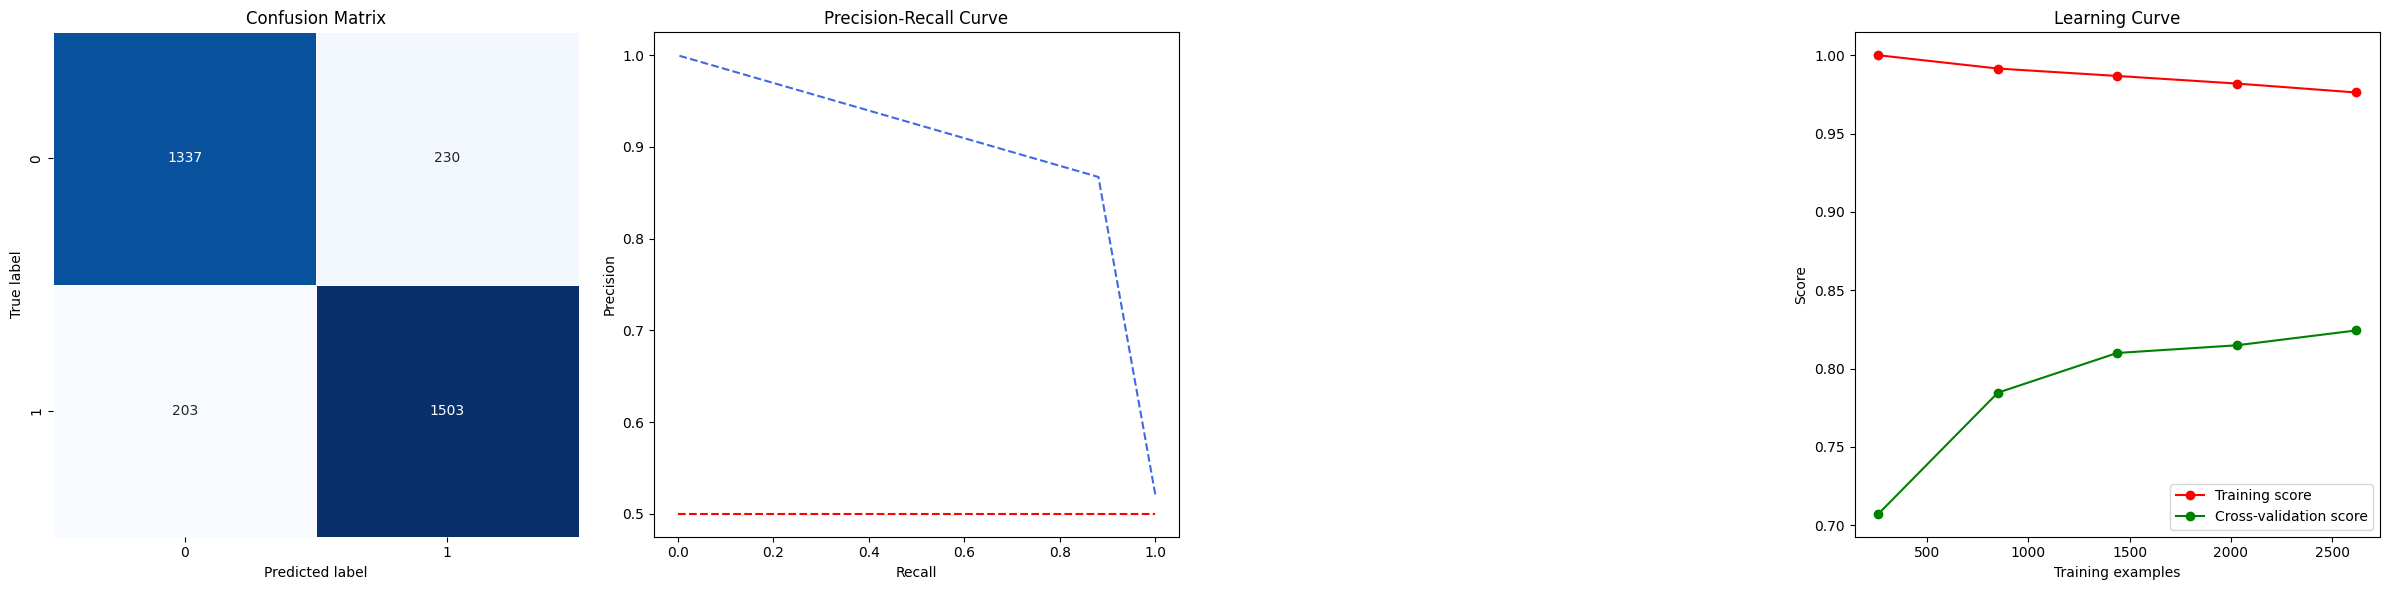

[LightGBM]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1567
           1       0.88      0.82      0.85      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



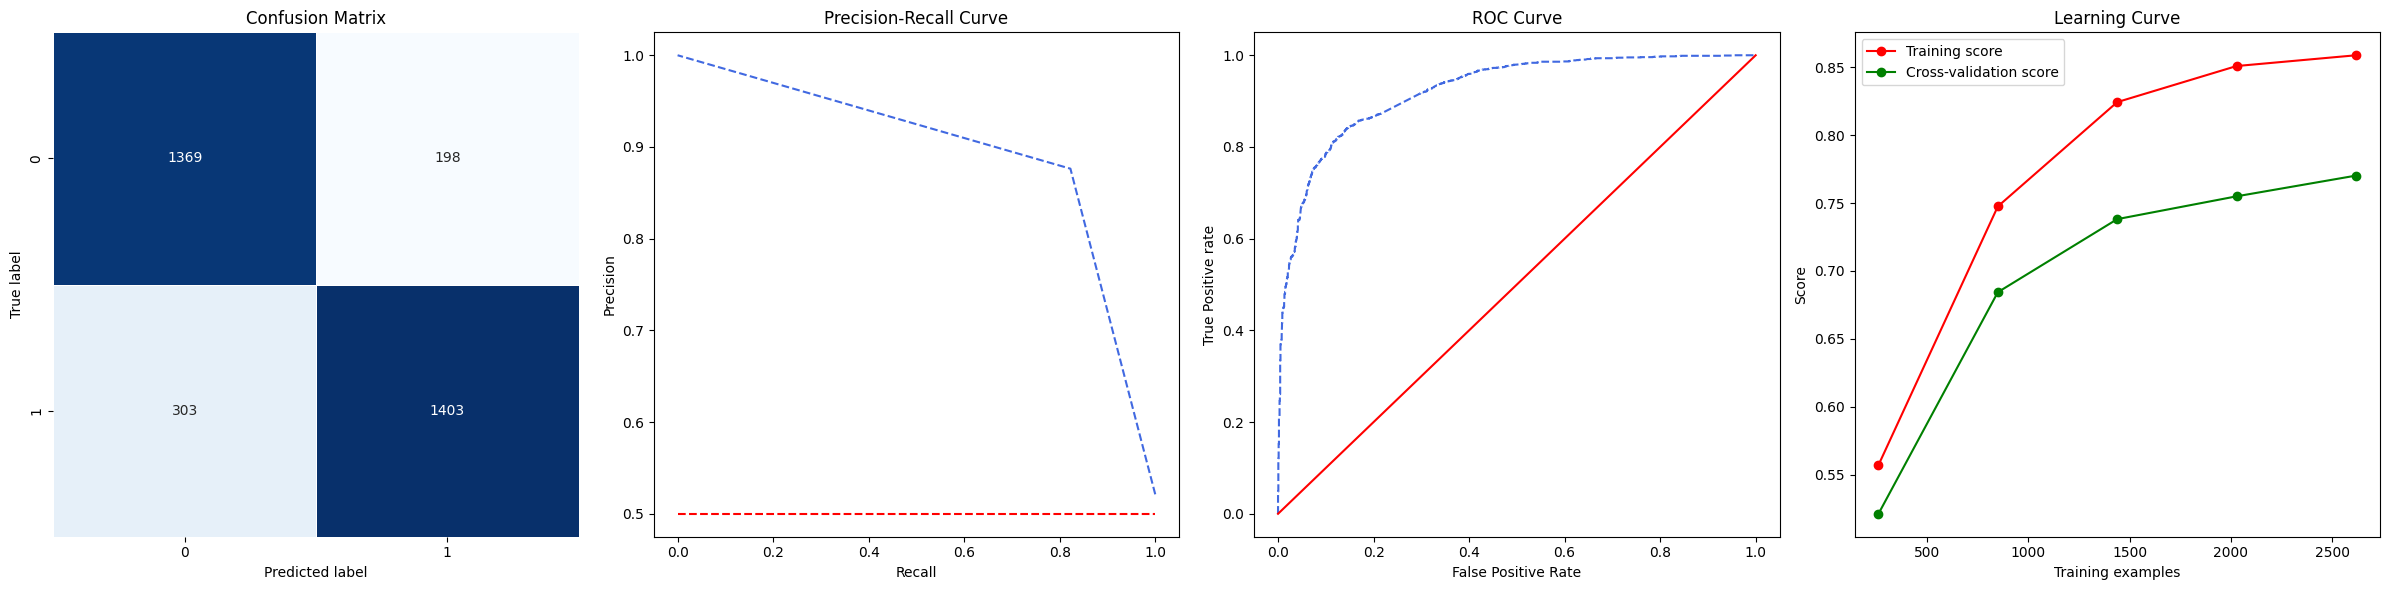

[SimpleRNN]
103/103 [==============================] - 0s 3ms/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 64, 24)            343800    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 24)                1176      
                                                                 
 dense_12 (Dense)            (None, 1)                 25        
                                                                 
Total params: 345001 (1.32 MB)
Trainable params: 345001 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.8468526930564568
Precision: 0.764947245017585
F1: 0.8053650474852483
Accuracy: 0.8053773296669722



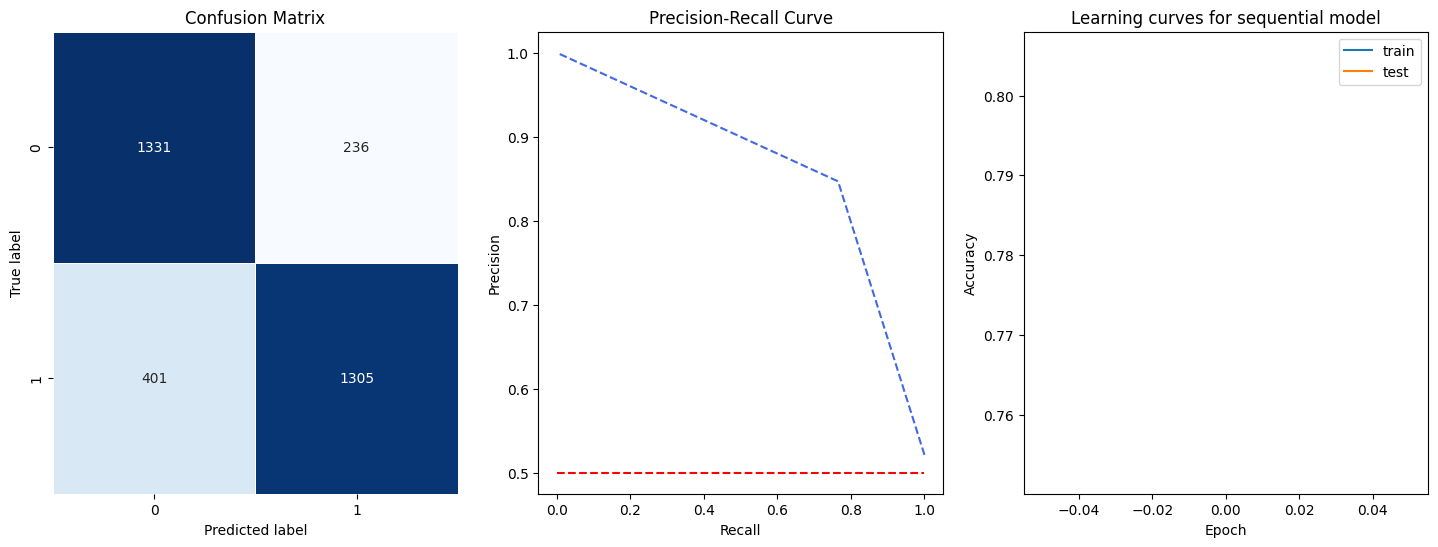

[LSTM]
103/103 [==============================] - 1s 6ms/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 64, 24)            343800    
                                                                 
 lstm_6 (LSTM)               (None, 32)                7296      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 351129 (1.34 MB)
Trainable params: 351129 (1.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.5212343415826459
Precision: 1.0
F1: 0.34263908415344446
Accuracy: 0.5212343415826459



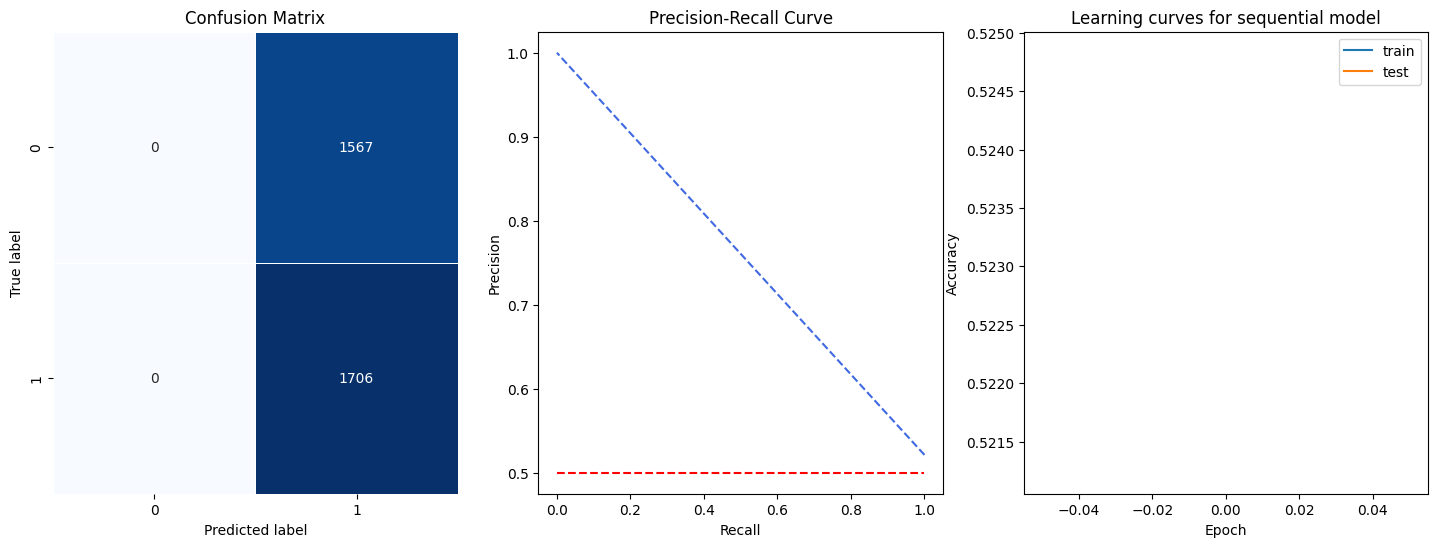

[BI-LSTM]
103/103 [==============================] - 2s 14ms/step
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 64, 128)           1833600   
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1932545 (7.37 MB)
Trainable params: 1932545 (7.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Re

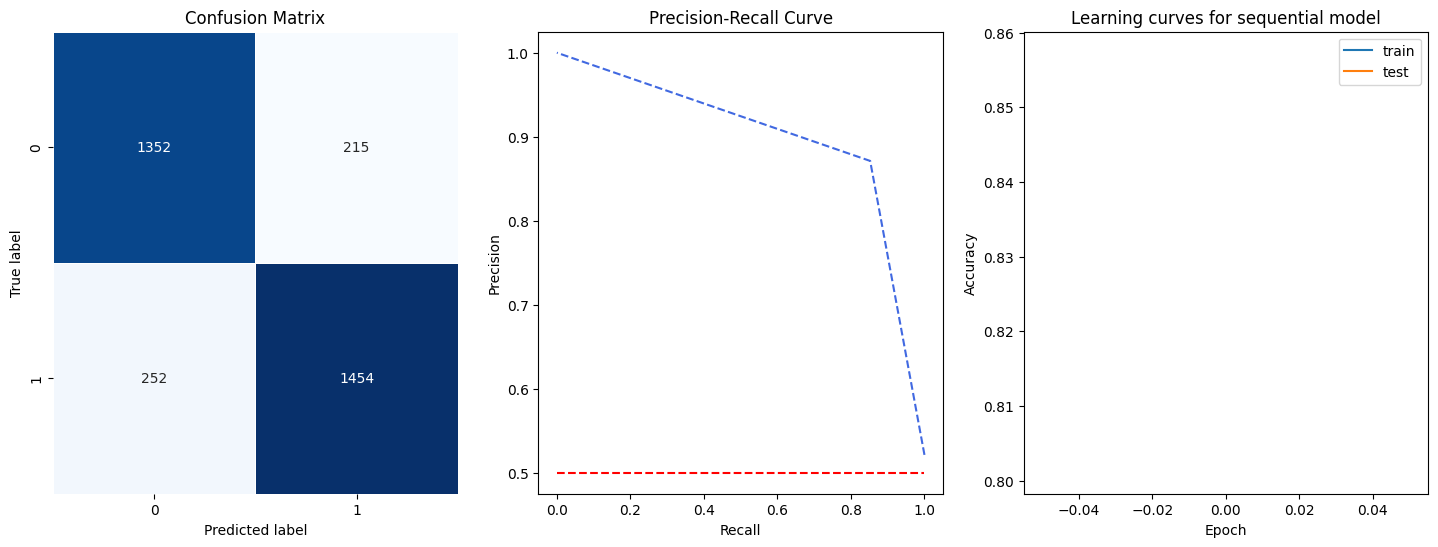

[GRU]
103/103 [==============================] - 1s 4ms/step
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 64, 24)            343800    
                                                                 
 gru_3 (GRU)                 (None, 24)                3600      
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 347425 (1.33 MB)
Trainable params: 347425 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.5212343415826459
Precision: 1.0
F1: 0.34263908415344446
Accuracy: 0.5212343415826459



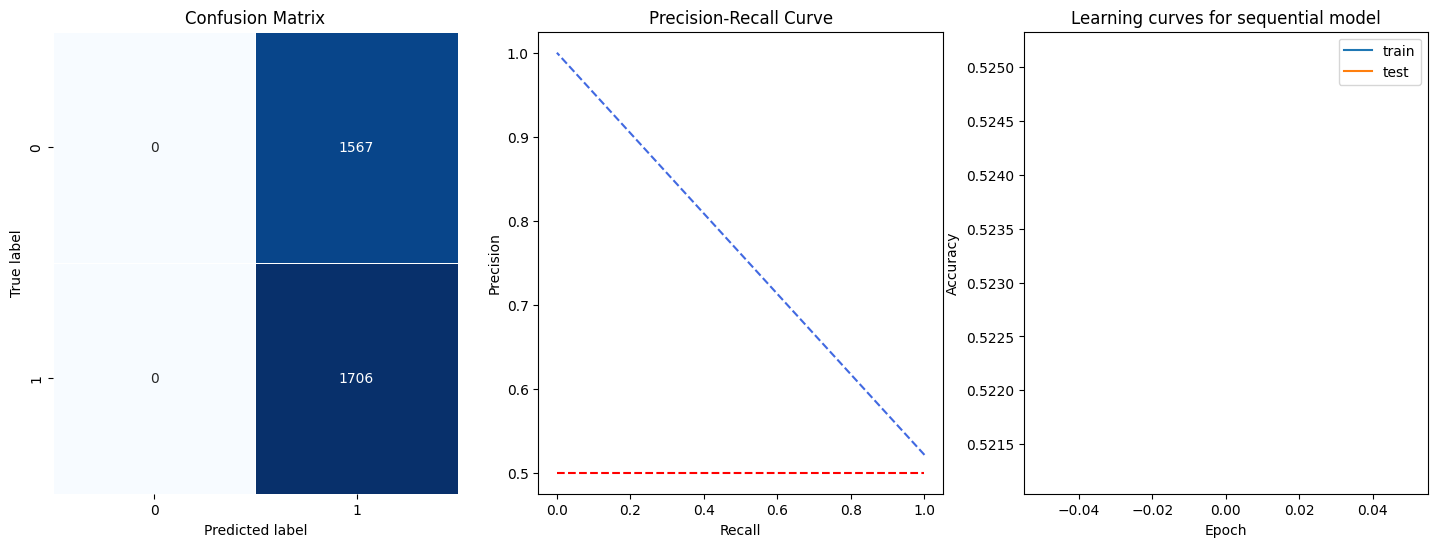

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
import numpy as np

def plot_results(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(24,6))
    plt.subplot(141)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(142)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU', 'SVC']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(143)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
      plt.subplot(143)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()

    #  Learning curve
    else:
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(144)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()

    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['text P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 64
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVC': svm.SVC(kernel='linear'),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=1,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results(name, model, padded_test, Y_test, predictions, history)
        model.save(f'{name}.h5')
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
import numpy as np

def plot_cm_pr(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(24,6))
    plt.subplot(141)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(142)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

def plot_roc_lc(name, model, X_test, Y_test, predictions, history):

    if name in ['SVC']:
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(143)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()

    else:
    # roc curve for tpr = fpr
      if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
        random_probs = [0 for i in range(len(Y_test))]
        p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
        pred_prob = model.predict_proba(X_test)
        fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
        plt.subplot(143)
        plt.plot(fpr, tpr, linestyle='--',color='royalblue')
        plt.plot(p_fpr, p_tpr, color='red')
        # title
        plt.title('ROC Curve')
        # x label
        plt.xlabel('False Positive Rate')
        # y label
        plt.ylabel('True Positive rate')
        plt.savefig('ROC',dpi=300)
        plt.tight_layout(pad=1.20)

        #  Learning curve
        train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.subplot(144)
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.title('Learning Curve')
        plt.legend(loc="best")
        plt.tight_layout()
      else:
        plt.subplot(143)
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='test')
        plt.title('Learning curves for sequential model')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['text P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 64
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVC': svm.SVC(kernel='linear'),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
       name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=1,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results(name, model, padded_test, Y_test, predictions, history)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

IndentationError: ignored

In [ ]:
t.word_index

{'day': 1,
 'good': 2,
 'love': 3,
 'like': 4,
 'happy': 5,
 'got': 6,
 'today': 7,
 'mother': 8,
 'work': 9,
 "'": 10,
 'time': 11,
 'going': 12,
 'shit': 13,
 'thanks': 14,
 'great': 15,
 'oh': 16,
 'night': 17,
 'know': 18,
 'hope': 19,
 'miss': 20,
 'want': 21,
 'feel': 22,
 'na': 23,
 'think': 24,
 'fun': 25,
 'wish': 26,
 'new': 27,
 'home': 28,
 'sad': 29,
 'laughing': 30,
 'nice': 31,
 'loud': 32,
 'sorry': 33,
 'morning': 34,
 'mom': 35,
 'bad': 36,
 'need': 37,
 'thing': 38,
 'haha': 39,
 'look': 40,
 'twitter': 41,
 'week': 42,
 'friend': 43,
 'tomorrow': 44,
 'tonight': 45,
 'hate': 46,
 'better': 47,
 'thank': 48,
 'awesome': 49,
 'gon': 50,
 'right': 51,
 'way': 52,
 'come': 53,
 'weekend': 54,
 'best': 55,
 'sleep': 56,
 'people': 57,
 'bed': 58,
 'getting': 59,
 'suck': 60,
 'guy': 61,
 'yeah': 62,
 'school': 63,
 'feeling': 64,
 'sick': 65,
 'god': 66,
 'having': 67,
 'wait': 68,
 'dont': 69,
 'life': 70,
 'cool': 71,
 'girl': 72,
 'tired': 73,
 'movie': 74,
 'hurt': 7

In [ ]:
vocab_size

14383

In [ ]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

In [ ]:
max_length = 128
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

In [ ]:
padded_train

array([[  173,  5734,   946, ...,     0,     0,     0],
       [ 1002,    18,  2008, ...,     0,     0,     0],
       [   26,    12,   283, ...,     0,     0,     0],
       ...,
       [14379, 14380,   223, ...,     0,     0,     0],
       [  136,    58,    17, ...,     0,     0,     0],
       [  233, 14382,   578, ...,     0,     0,     0]], dtype=int32)

In [ ]:
encoded_train

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 128
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

def plot_results(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(222)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(223)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

      #  Learning curve
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(224)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()
    else:
      plt.subplot(223)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['text P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVC': SVC(kernel='linear', probability=True),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=50,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results(name, model, padded_test, Y_test, predictions, history)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

NameError: ignored

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1603
           1       0.86      0.87      0.87      1670

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



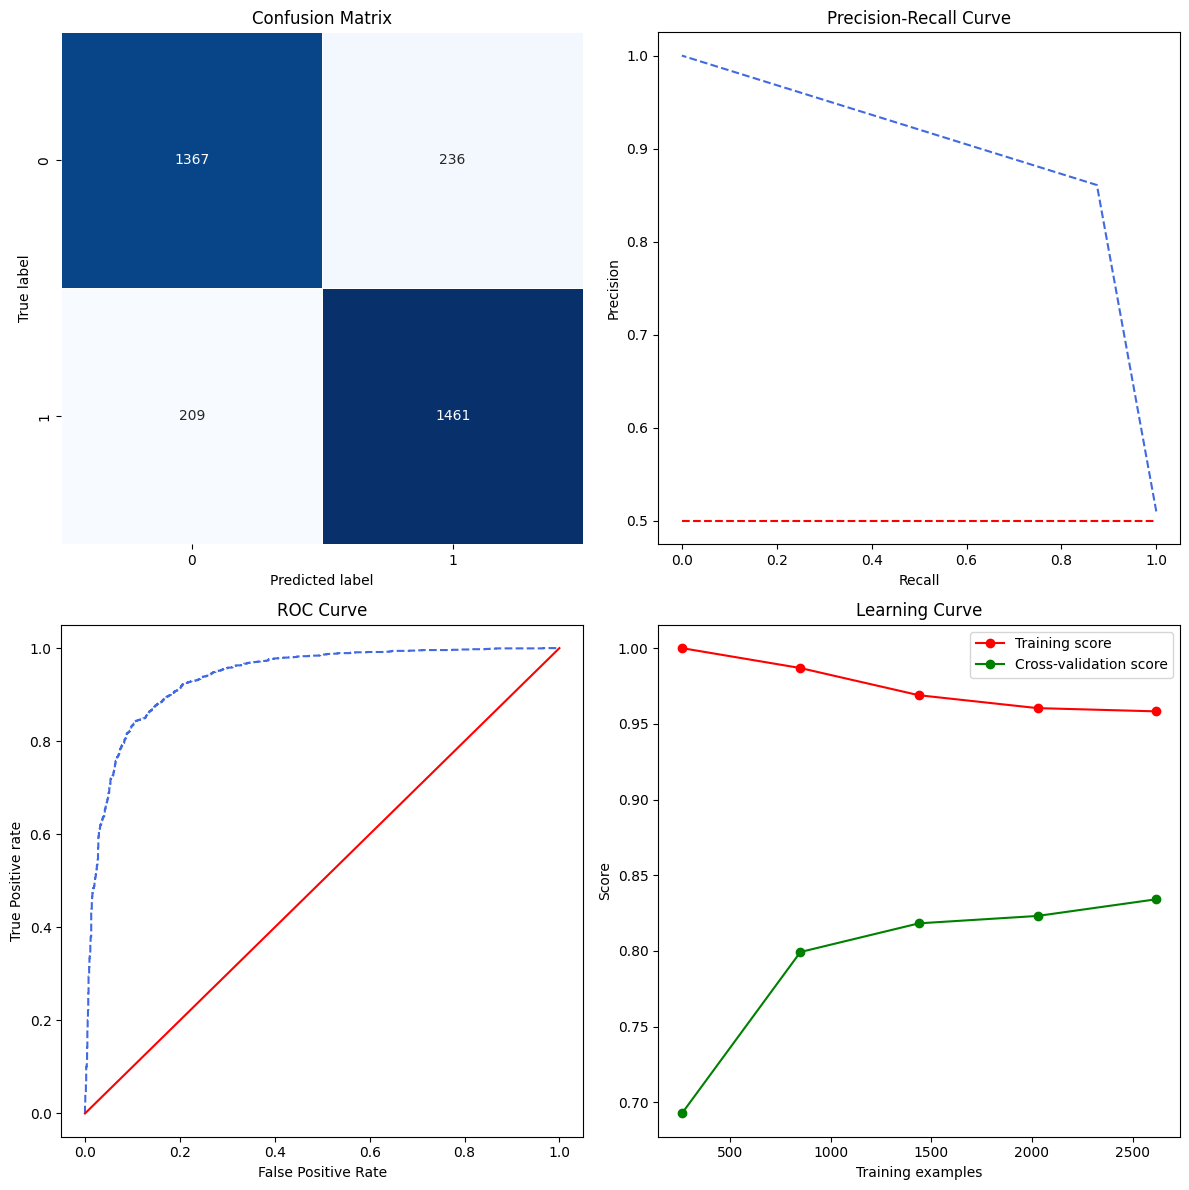

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1603
           1       0.82      0.92      0.87      1670

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



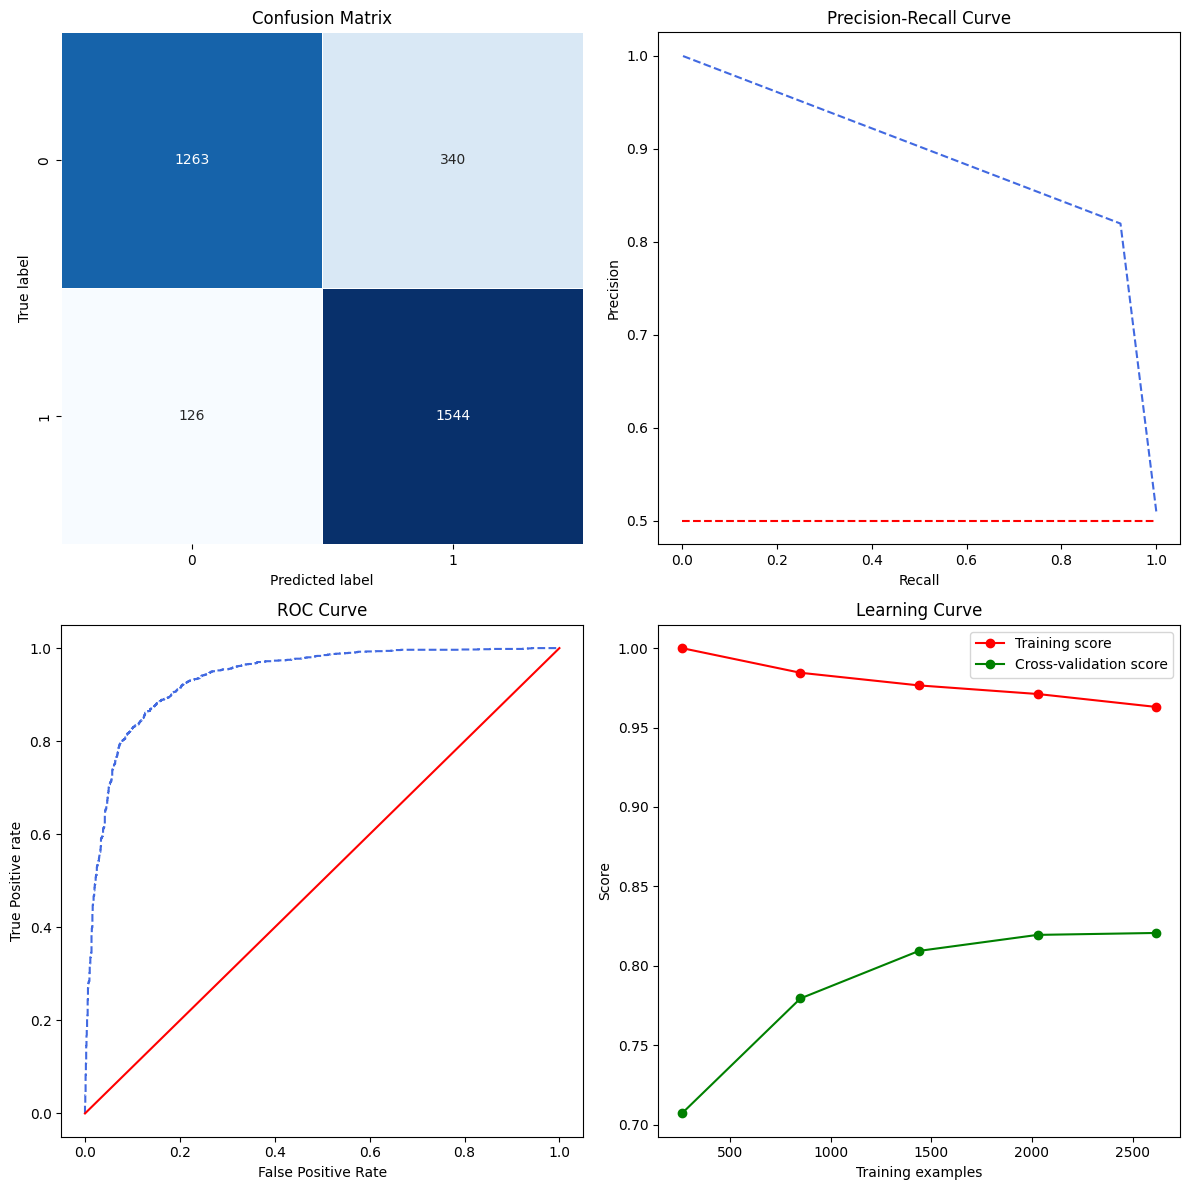

[Gaussian Naive Bayes]
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1603
           1       0.74      0.57      0.65      1670

    accuracy                           0.68      3273
   macro avg       0.69      0.68      0.68      3273
weighted avg       0.69      0.68      0.68      3273



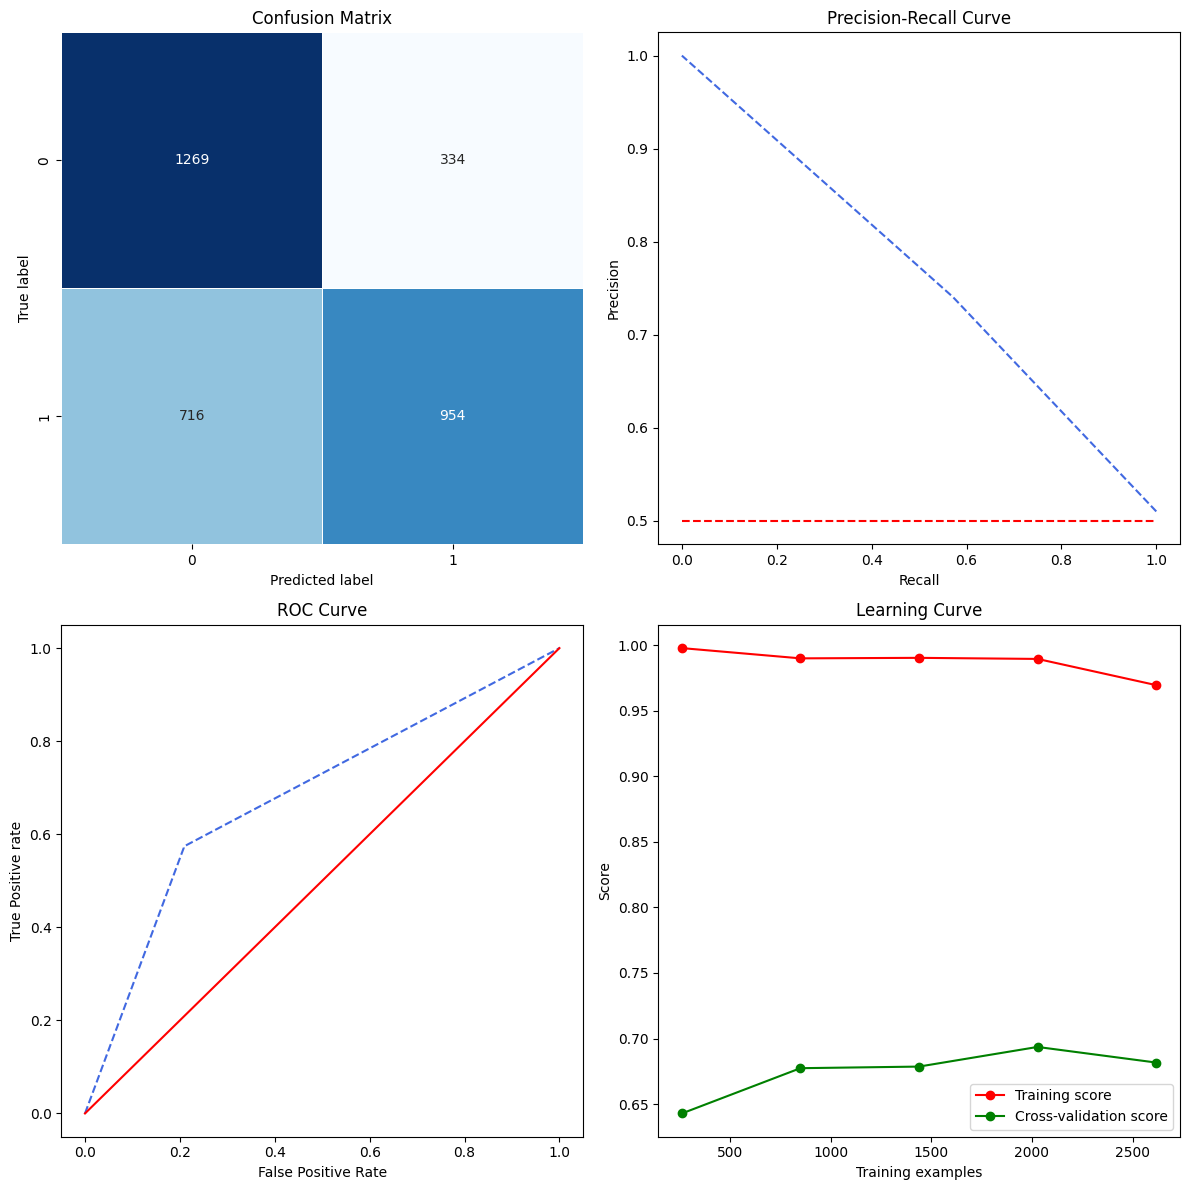

[KNN]
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      1603
           1       0.93      0.15      0.26      1670

    accuracy                           0.56      3273
   macro avg       0.73      0.57      0.47      3273
weighted avg       0.73      0.56      0.47      3273



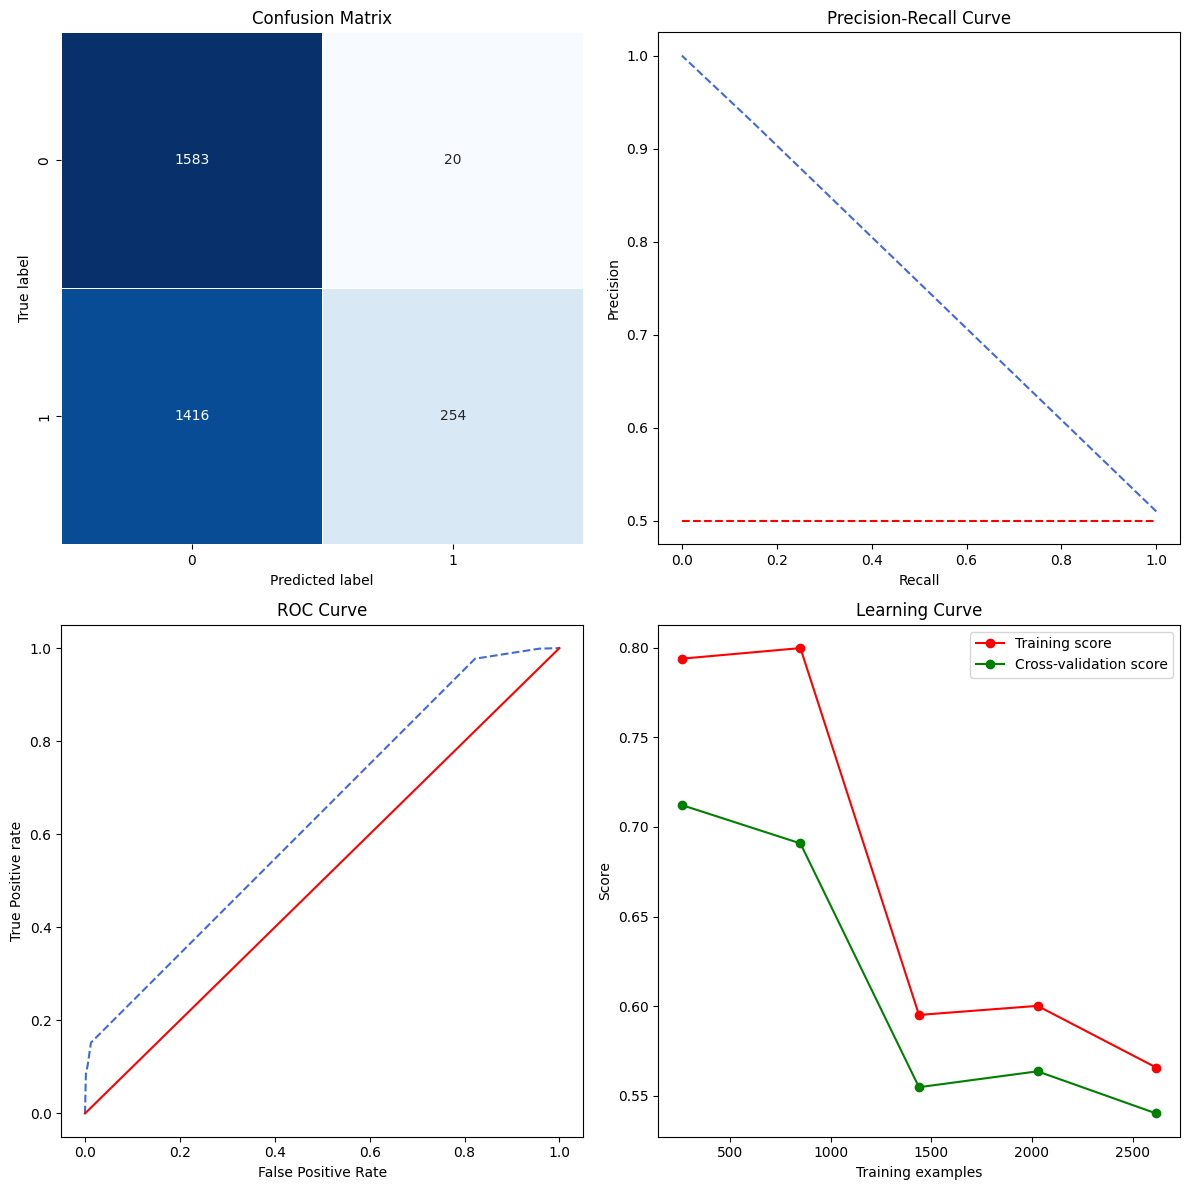

[LightGBM]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1603
           1       0.86      0.83      0.85      1670

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



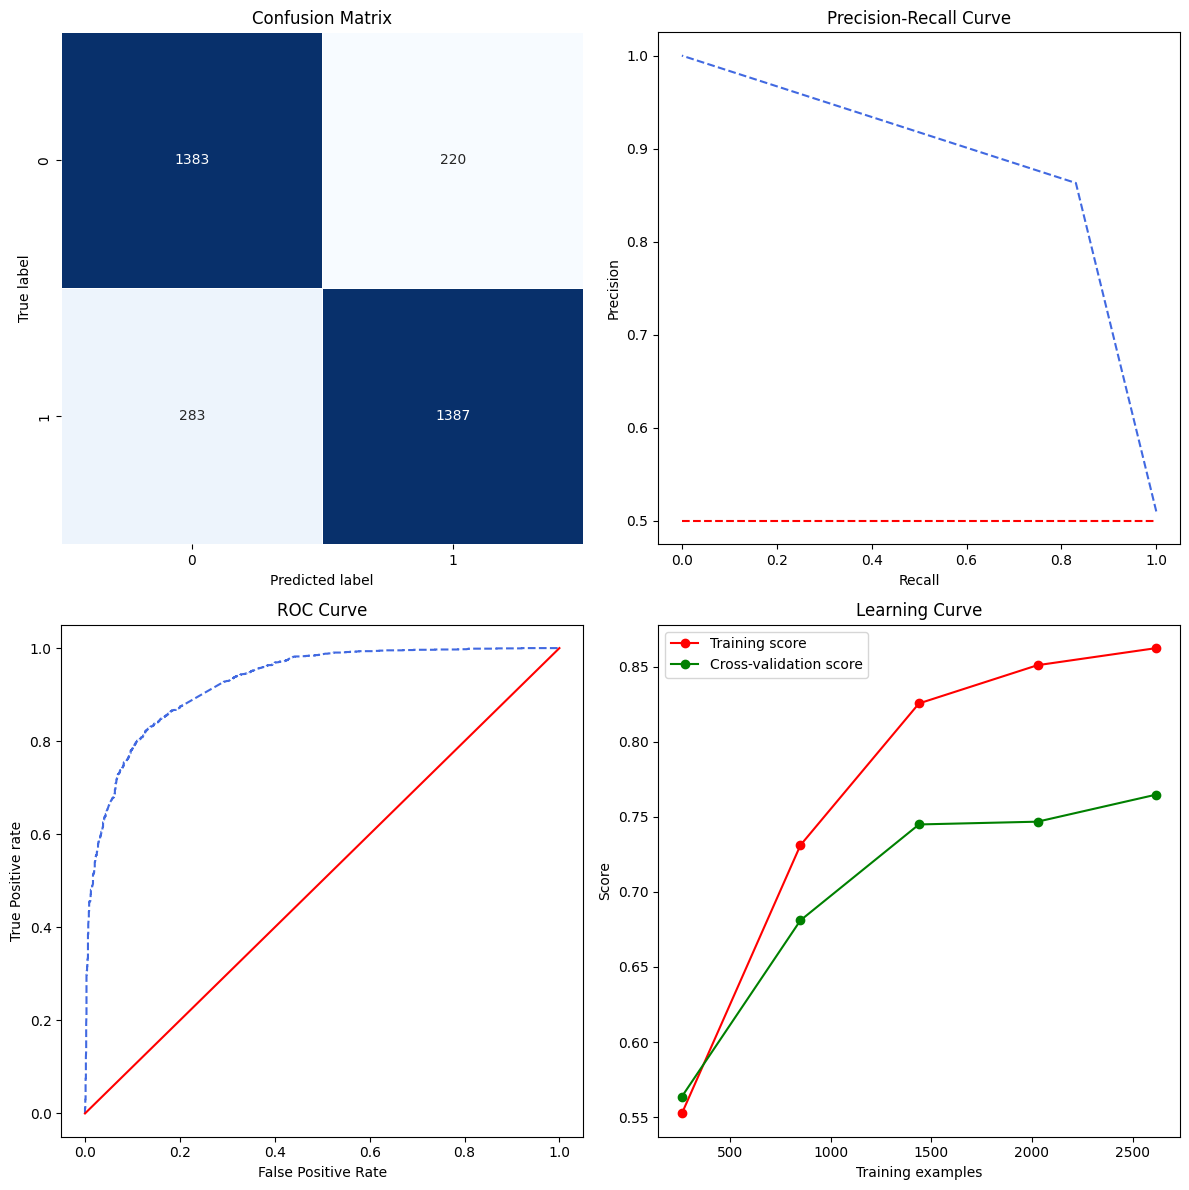

[SimpleRNN]


NameError: ignored

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

def plot_results3(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(222)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(223)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

      #  Learning curve
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(224)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()
    else:
      plt.subplot(223)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')
'''
# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
'''

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=50,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results3(name, model, padded_test, Y_test, predictions, history)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

def plot_results3(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(222)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(223)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

      #  Learning curve
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(224)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()
    else:
      plt.subplot(223)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=50,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results3(name, model, padded_test, Y_test, predictions, history)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

In [ ]:
X_train_vectorized

<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
TfidfVectorizer()

In [ ]:
df.dropna()

def preprocess(text, urban_dictionary=True, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_noneEnglish=False):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    #text = re.sub(r'\d+', '', text) #Remove digits

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  if rm_stopwords:
    text = text.split(' ') #word_tokenize(text)
    text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = ' '.join(text)

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = ' '.join(new_text)

  text = text.lower()

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])

  if rm_noneEnglish:
    text = text.split(' ')
    text = [word for word in text if word in ENGLISH_WORDS]
    text = ' '.join(text)

  return text

df['text Preprocessed'] = df['text'].apply(preprocess)

df.head(5000)


KeyError: ignored

In [ ]:
def count_words(text):
    if isinstance(text, str):  # Check if text is a string (not NaN)
        return len(text.split())
    else:
        return 0  # Return 0 for NaN or non-string values

# Applying the function to create a new 'Word_Count' column
df['Word_Count'] = df['text P'].apply(count_words).sum()

In [ ]:
import pandas as pd
import numpy as np

def count_unique_words(text):
    if isinstance(text, str):  # Check if text is a string (not NaN)
        return len(set(text.split()))
    else:
        return 0  # Return 0 for NaN or non-string values

# Applying the function to calculate the total count of unique words
df['total_unique_words'] = df['text P'].apply(count_unique_words).sum()

In [ ]:
def count_characters(text):
    if isinstance(text, str):  # Check if text is a string (not NaN)
        return len(text)
    else:
        return 0  # Return 0 for NaN or non-string values

# Applying the function to create a new 'Word_Count' column
df['character_Count'] = df['text P'].apply(count_characters).sum()

In [ ]:
df.head(1000)

sentiment                                             text P  \
0     neutral                                   responded  going   
1    negative                         sooo sad miss san diego      
2    negative                                      bos bullying    
3    negative                                   interview  leave   
4    negative                            son      release bought   
..        ...                                                ...   
995  positive                 twittering  like bos  thanks savvv   
996  positive  sleep pattern screwed need try stay midnight d...   
997  negative  demise woolworth easy find reasonably priced p...   
998  positive                         fourth  happy star war day   
999  negative  unlocked decade  lucky   gottta luck involves ...   

     character_Count  Word_Count  total_unique_words  
0            1080280      170887              166780  
1            1080280      170887              166780  
2            1080280      170887              166780  
3            1080280      170887              166780  
4            1080280      170887              166780  
..               ...         ...                 ...  
995          1080280      170887              166780  
996          1080280      170887              166780  
997          1080280      170887              166780  
998          1080280      170887              166780  
999          1080280      170887              166780  

[1000 rows x 5 columns]

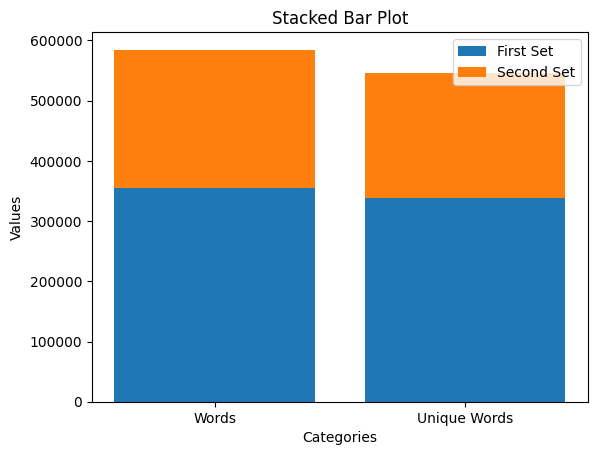

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Words', 'Unique Words']
values1 = [354571, 338557]  # Values for the first set of bars
values2 = [230014, 207850]  # Values for the second set of bars

# Plotting
plt.bar(categories, values1, label='First Set')
plt.bar(categories, values2, bottom=values1, label='Second Set')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')
plt.legend()

# Show plot
plt.show()

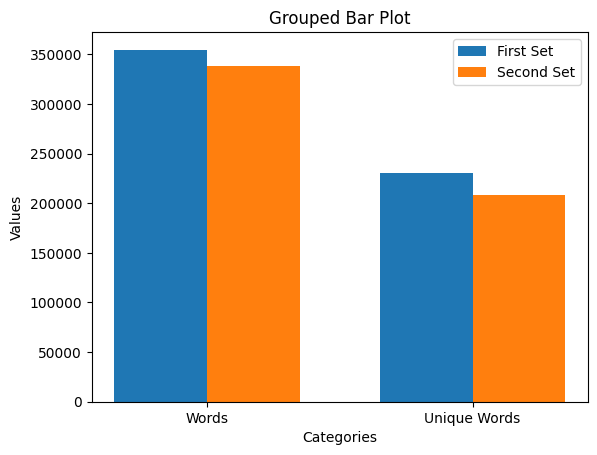

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Words', 'Unique Words']
values1 = [354571, 230014]  # Values for the first set of bars
values2 = [338557, 207850]  # Values for the second set of bars

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
x = np.arange(len(categories))

# Plotting
plt.bar(x - bar_width/2, values1, width=bar_width, label='First Set')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Second Set')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Plot')
plt.xticks(x, categories)
plt.legend()

# Show plot
plt.show()

In [ ]:
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  \
0  I`d have responded, if I were going   neutral   
1                             Sooo SAD  negative   
2                          bullying me  negative   
3                       leave me alone  negative   
4                        Sons of ****,  negative   

                      text PTest  total_unique_words  
0              responded , going              338557  
1  sooo sad miss san diego ! ! !              338557  
2               bos bullying ...              338557  
3              interview ! leave              338557  
4   son * * * * , release bought              338557

In [ ]:
df.shape

(27480, 5)

In [ ]:
def rep(text):
  text = re.sub("`", "'", text)
  text = word_tokenize(text)
  text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
  text = ' '.join(text)
  return(text)

In [ ]:
spell = SpellChecker()
def correctSpellingsPY(text):
  try:
    correctedTweet = []
    missSpelledWords = spell.unknown(word_tokenize(text)) #To avoid altering acryonyms
    for word in word_tokenize(text): # use tokenize method to split the text
      if word in missSpelledWords:
        correctedTweet.append(spell.correction(word))
      else:
        correctedTweet.append(word)
    return ' '.join(correctedTweet) # join the corrected words with space
  except:
    return text

def correctSpellingsTB(tweet):
  return str(TextBlob(tweet).correct())

In [ ]:
df["textR"] = df["text"].apply(rep)

In [ ]:
%%time
df["PY"] = df["text"].apply(correctSpellingsPY)

In [ ]:
%%time
df["TB"] = df["text"].apply(correctSpellingsTB)

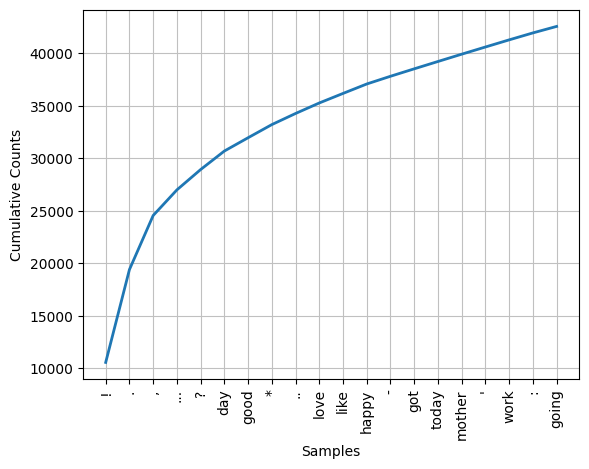

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
import nltk
from nltk.probability import FreqDist
import pandas as pd

# Assuming 'df' is your DataFrame and 'text_column' is the column with the text
text_data = df['text P'].str.cat(sep=' ')
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)

In [ ]:
negative_data

NameError: ignored

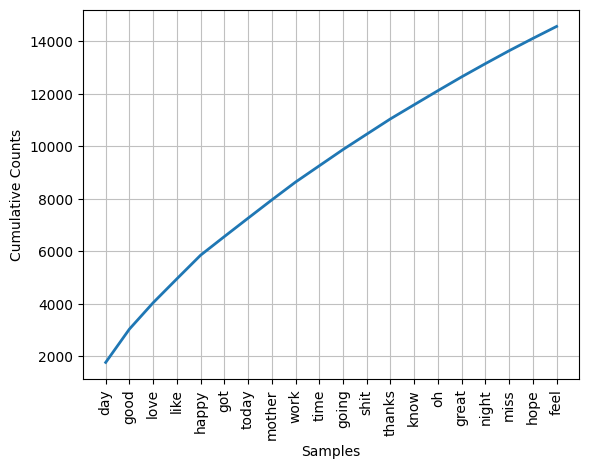

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
import nltk
from nltk.probability import FreqDist
import pandas as pd

# Assuming 'df' is your DataFrame and 'text_column' is the column with the text
text_data = df['text P2'].str.cat(sep=' ')
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)

In [ ]:
df.drop(columns=['text'], inplace=True)

In [ ]:
# Stemming/Lemmatizing Libraries
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize

# Porter Stemmer
def porterStemming(text):
  stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
  return ' '.join(stems)

#Snowball Stemming
def snowballStemming(text):
  stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
  return ' '.join(stems)

def lancasterStemming(text):
  stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
  return ' '.join(stems)

'''
def lancasterStemming(text):
  stems = [LancasterStemmer().stem(word) for word in text.spit(' ')]
  return ' '.join(stems)
'''

"\ndef lancasterStemming(text):\n  stems = [LancasterStemmer().stem(word) for word in text.spit(' ')]\n  return ' '.join(stems)\n"

In [ ]:
%%time
df["PS"] = df["textR"].apply(porterStemming)

CPU times: user 13.1 s, sys: 44.8 ms, total: 13.1 s
Wall time: 13.3 s


In [ ]:
%%time
df['SS'] = df["textR"].apply(snowballStemming)

CPU times: user 9.64 s, sys: 53.1 ms, total: 9.7 s
Wall time: 9.8 s


In [ ]:
%%time
df['LS'] = df["textR"].apply(lancasterStemming)

CPU times: user 35.5 s, sys: 123 ms, total: 35.6 s
Wall time: 37.3 s


<Figure size 800x600 with 0 Axes>

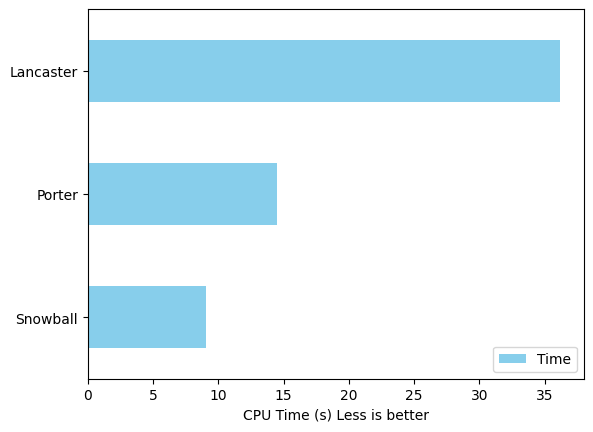

In [ ]:
from matplotlib import pyplot as plt

data = {
    'Stemmer': ['Snowball', 'Porter', 'Lancaster'],
    'Time': [9.05, 14.5, 36.2]
}
df2 = pd.DataFrame(data)

# Plotting horizontal bars using Pandas
plt.figure(figsize=(8, 6))
df2.plot(kind='barh', x='Stemmer', y='Time', color='skyblue')
plt.xlabel('CPU Time (s) Less is better')
plt.ylabel('')
plt.show()

<Figure size 800x600 with 0 Axes>

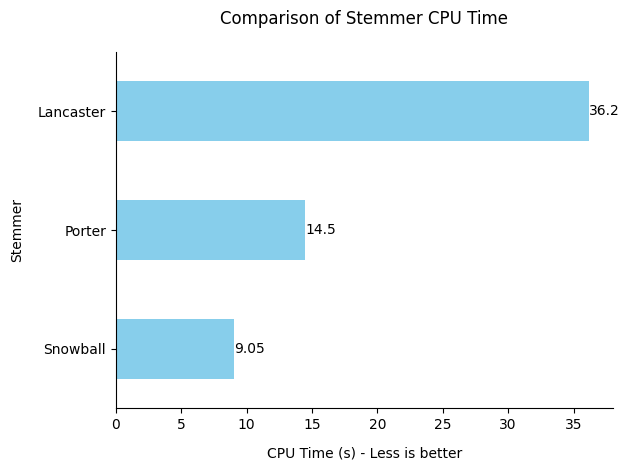

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

data = {
    'Stemmer': ['Snowball', 'Porter', 'Lancaster'],
    'Time': [9.05, 14.5, 36.2]
}
df2 = pd.DataFrame(data)

# Plotting horizontal bars using Pandas
plt.figure(figsize=(8, 6))

# Plotting the bar chart without legend
bars = df2.plot(kind='barh', x='Stemmer', y='Time', color='skyblue', legend=False)

# Enhancing visual appeal - customizing aesthetics
bars.spines['top'].set_visible(False)
bars.spines['right'].set_visible(False)
bars.set_xlabel('CPU Time (s) - Less is better', labelpad=10)
bars.set_ylabel('Stemmer', labelpad=10)
bars.set_title('Comparison of Stemmer CPU Time', pad=20)

# Adding data labels to the bars
for index, value in enumerate(df2['Time']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

data = {
    'Stemmer': ['Snowball', 'Porter', 'Lancaster'],
    'Time': [9.05, 14.5, 36.2]
}
df2 = pd.DataFrame(data)

# Rearranging the DataFrame to reverse the order
df2 = df2[::-1]

# Plotting horizontal bars using Pandas
plt.figure(figsize=(8, 6))

# Plotting the bar chart without legend
bars = df2.plot(kind='barh', x='Stemmer', y='Time', color='skyblue', legend=False)

# Enhancing visual appeal - customizing aesthetics
bars.spines['top'].set_visible(False)
bars.spines['right'].set_visible(False)
bars.set_xlabel('CPU Time (s) - Less is better', labelpad=10)
bars.set_ylabel('Stemmer', labelpad=10)
bars.set_title('Comparison of Stemmer CPU Time', pad=20)

# Adding data labels to the bars
for index, value in enumerate(df2['Time']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
df.tail(1000)

textR  \
26481  drag hell looks freakin scary watch terminator...   
26482                         http : //twitpic.com/4wp8l   
26483                       SEND PHOTO MAN ily favourite   
26484  want go Peru summer ahhhhhhh ! Hopefully ! Yes...   
26485            bye selena ! ! ! bad didnt get talk u u   
...                                                  ...   
27476  wish could come see u Denver husband lost job ...   
27477  've wondered rake . client made clear .NET , n...   
27478  Yay good . Enjoy break - probably need hectic ...   
27479                                    worth * * * * .   
27480   flirting going - ATG smiles . Yay . ( ( hugs ) )   

                                                      PS  \
26481  drag hell look freakin scari watch termin ! re...   
26482                         http : //twitpic.com/4wp8l   
26483                        send photo man ili favourit   
26484  want go peru summer ahhhhhhh ! hope ! yesyesy ...   
26485            bye selena ! ! ! bad didnt get talk u u   
...                                                  ...   
27476  wish could come see u denver husband lost job ...   
27477  've wonder rake . client made clear .net , n't...   
27478  yay good . enjoy break - probabl need hectic w...   
27479                                    worth * * * * .   
27480           flirt go - atg smile . yay . ( ( hug ) )   

                                                      SS  \
26481  drag hell look freakin scari watch termin ! re...   
26482                         http : //twitpic.com/4wp8l   
26483                        send photo man ili favourit   
26484  want go peru summer ahhhhhhh ! hope ! yesyesy ...   
26485            bye selena ! ! ! bad didnt get talk u u   
...                                                  ...   
27476  wish could come see u denver husband lost job ...   
27477  ve wonder rake . client made clear .net , n't ...   
27478  yay good . enjoy break - probabl need hectic w...   
27479                                    worth * * * * .   
27480           flirt go - atg smile . yay . ( ( hug ) )   

                                                      LS  
26481  drag hel look freakin scary watch termin ! rea...  
26482                         http : //twitpic.com/4wp8l  
26483                        send photo man ily favourit  
26484  want go peru sum ahhhhhhh ! hop ! yesyesy ! mi...  
26485             bye selen ! ! ! bad didnt get talk u u  
...                                                  ...  
27476  wish could com see u denv husband lost job ca ...  
27477  've wond rak . cli mad clear .net , n't forc d...  
27478  yay good . enjoy break - prob nee hect weekend...  
27479                                      wor * * * * .  
27480         flirt going - atg smil . yay . ( ( hug ) )  

[1000 rows x 4 columns]

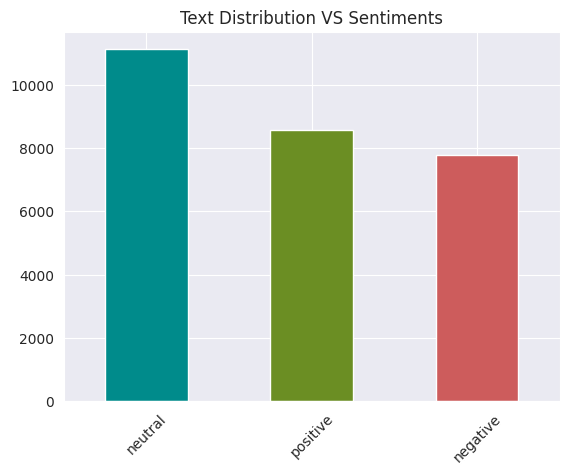

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_Class= pd.value_counts(df["sentiment"], sort= True)
sns.set_style("darkgrid")
count_Class.plot(kind = 'bar', color = ["darkcyan", "olivedrab", "indianred"])
plt.title('Text Distribution VS Sentiments')
plt.xticks(rotation=45)
plt.show()
#plt is  matplotlib. pyplot

In [ ]:
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  Word_Count  character_Count  \
0  I`d have responded, if I were going   neutral      354571          1877709   
1                             Sooo SAD  negative      354571          1877709   
2                          bullying me  negative      354571          1877709   
3                       leave me alone  negative      354571          1877709   
4                        Sons of ****,  negative      354571          1877709   

   total_unique_words  
0              338557  
1              338557  
2              338557  
3              338557  
4              338557

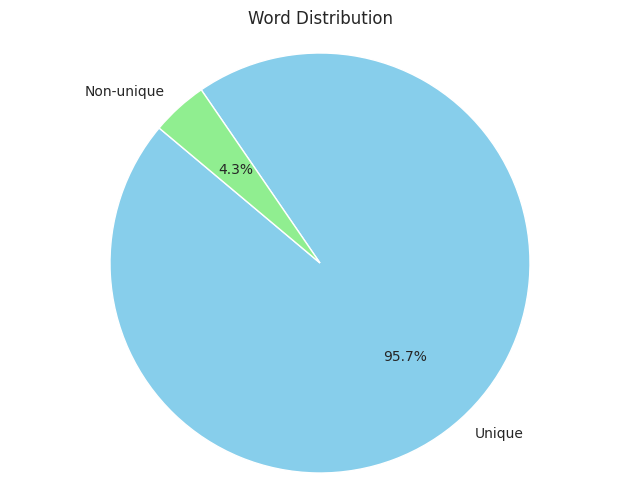

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Unique', 'Non-unique']
values = [354571, 16014]
colors = ['skyblue', 'lightgreen']  # Color for each category

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Word Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.show()

In [ ]:
data = {
    'Categories': ['Words', 'Unique Words'],
    'Values': [354571, 338557]
}
df = pd.DataFrame(data)

# Plotting horizontal bars using Pandas
plt.figure(figsize=(8, 6))
df.plot(kind='barh', x='Categories', y='Values', color='skyblue')
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart')
plt.grid(axis='x')  # Adding gridlines along the x-axis
plt.show()